# Analysis of gpu-decoded groups

by Pu Zheng


## 0.imports

In [2]:
%run "E:\Users\puzheng\Documents\Startup_py3.py"
sys.path.append(r"E:\Users\puzheng\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import get_img_info, visual_tools, corrections

In [3]:
# master folder for this dataset:
master_folder = r'Z:/20180911-IMR90_whole-chr21'
# get Folders, Field-of-views
folders, fovs = ia.get_img_info.get_folders(master_folder, feature='H', verbose=True)
# analysis
analysis_folder=master_folder+os.sep+'Analysis'

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 127
- Number of field of views: 65


## 1. Initialize cell list

In [4]:
reload(ia.get_img_info)
reload(ia.analysis)
reload(ia.corrections)
reload(ia.visual_tools)
reload(ia.classes)

<module 'ImageAnalysis3.classes' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\classes.py'>

### 1.1 initialize

In [5]:
# initialize cell-list
param = {'data_folder':r'Z:/20180911-IMR90_whole-chr21',
         'save_folder':r'Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu',
         'map_folder':r'Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\distmap',
         'num_threads': 15,
         };
lst = ia.classes.Cell_List(param, _chosen_fovs=[], _exclude_fovs=[])

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 127
- Number of field of views: 65
- Importing csv file: Z:/20180911-IMR90_whole-chr21\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
-- Hyb H0R0 exists in this data
-- DAPI exists in hyb: H0R0
- Importing csv file: Z:/20180911-IMR90_whole-chr21\Analysis\Encoding_Scheme.csv
-- hyb per group: 5
-- region per group: 10
-- colors: ['750', '647', '561']
-- number of groups: [22, 22, 22]
127 folders are found according to color-usage annotation.


### 1.2 Create cell objects

+ Create Cell_Data objects for field of view: Conv_zscan_04.dax 4
++ preparing variables
+ Load segmentation for fov 0
- load segmentation result from filename: Z:/20180911-IMR90_whole-chr21\Analysis\segmentation\Conv_zscan_00_segmentation.pkl


<IPython.core.display.Javascript object>


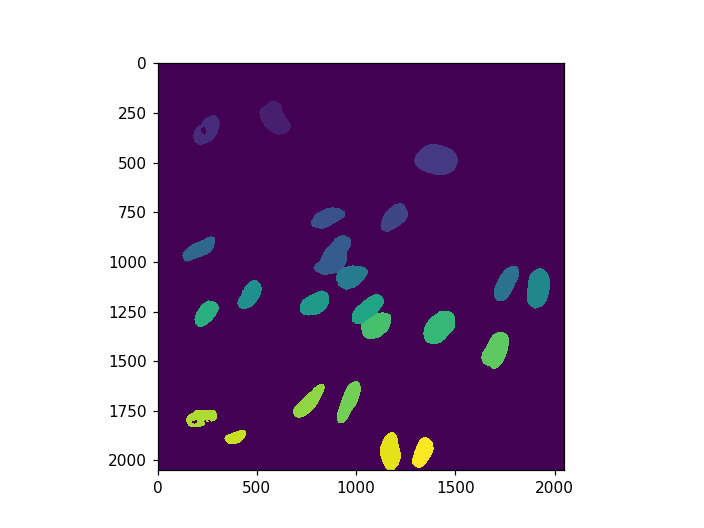

+ Drift correction for fov 0
+++ try to load drift correction from file: Z:/20180911-IMR90_whole-chr21\Analysis\drift\Conv_zscan_00_sequential_current_cor.pkl
+ Create cell_data objects!
+ Load segmentation for fov 1
- load segmentation result from filename: Z:/20180911-IMR90_whole-chr21\Analysis\segmentation\Conv_zscan_01_segmentation.pkl


<IPython.core.display.Javascript object>


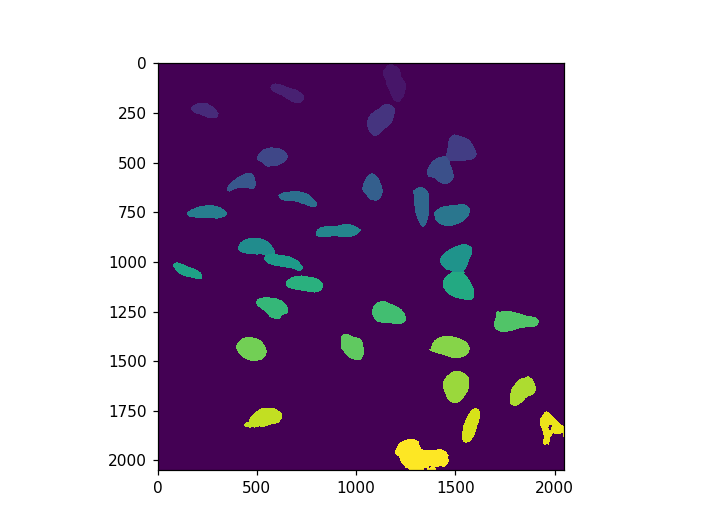

+ Drift correction for fov 1
+++ try to load drift correction from file: Z:/20180911-IMR90_whole-chr21\Analysis\drift\Conv_zscan_01_sequential_current_cor.pkl
+ Create cell_data objects!
+ Load segmentation for fov 2
- load segmentation result from filename: Z:/20180911-IMR90_whole-chr21\Analysis\segmentation\Conv_zscan_02_segmentation.pkl


<IPython.core.display.Javascript object>


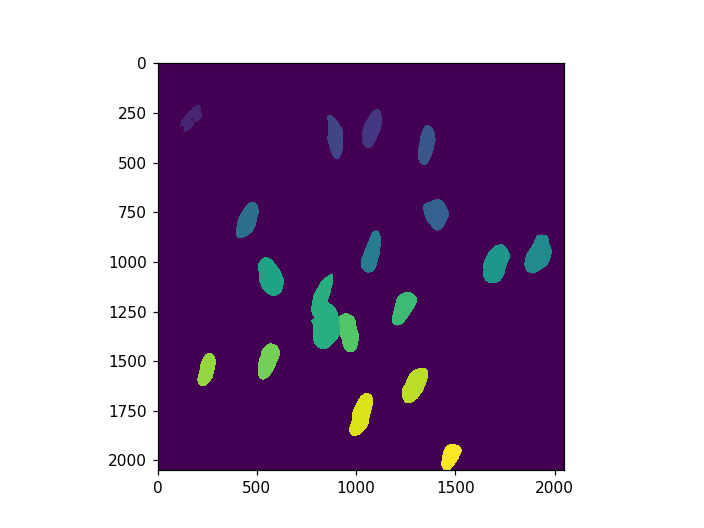

+ Drift correction for fov 2
+++ try to load drift correction from file: Z:/20180911-IMR90_whole-chr21\Analysis\drift\Conv_zscan_02_sequential_current_cor.pkl
+ Create cell_data objects!
+ Load segmentation for fov 3
- load segmentation result from filename: Z:/20180911-IMR90_whole-chr21\Analysis\segmentation\Conv_zscan_03_segmentation.pkl


<IPython.core.display.Javascript object>


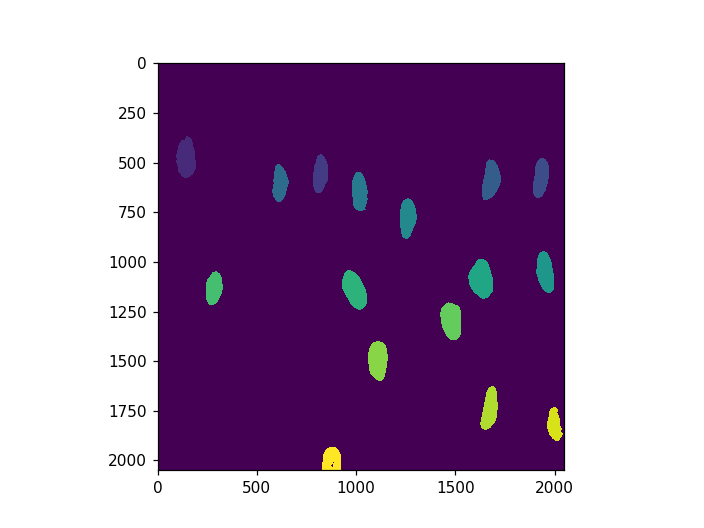

+ Drift correction for fov 3
+++ try to load drift correction from file: Z:/20180911-IMR90_whole-chr21\Analysis\drift\Conv_zscan_03_sequential_current_cor.pkl
+ Create cell_data objects!
+ Load segmentation for fov 4
- load segmentation result from filename: Z:/20180911-IMR90_whole-chr21\Analysis\segmentation\Conv_zscan_04_segmentation.pkl


<IPython.core.display.Javascript object>


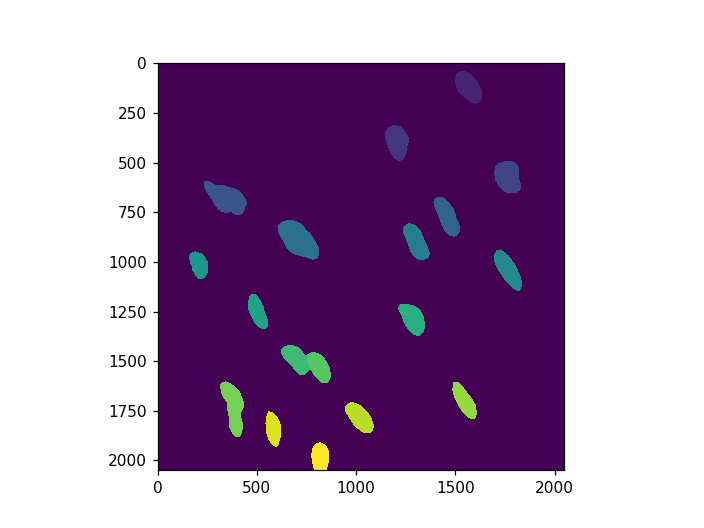

+ Drift correction for fov 4
+++ try to load drift correction from file: Z:/20180911-IMR90_whole-chr21\Analysis\drift\Conv_zscan_04_sequential_current_cor.pkl
+ Create cell_data objects!
+ Creating cells!


In [6]:
# create cells
lst._create_cells_fov([0,1,2,3,4], _overwrite_temp=False, _drift_size=650)

### 1.3 Load cell info from existing files

In [7]:
lst._load_cells_from_files('cell_info')

+ Load cells from existing files.
++ loading info for fov:0, cell:0
++ loading info for fov:0, cell:1
++ loading info for fov:0, cell:2
++ loading info for fov:0, cell:3
++ loading info for fov:0, cell:4
++ loading info for fov:0, cell:5
++ loading info for fov:0, cell:6
++ loading info for fov:0, cell:7
++ loading info for fov:0, cell:8
++ loading info for fov:0, cell:9
++ loading info for fov:0, cell:10
++ loading info for fov:0, cell:11
++ loading info for fov:0, cell:12
++ loading info for fov:0, cell:13
++ loading info for fov:0, cell:14
++ loading info for fov:0, cell:15
++ loading info for fov:0, cell:16
++ loading info for fov:0, cell:17
++ loading info for fov:0, cell:18
++ loading info for fov:0, cell:19
++ loading info for fov:0, cell:20
++ loading info for fov:0, cell:21
++ loading info for fov:1, cell:0
++ loading info for fov:1, cell:1
++ loading info for fov:1, cell:2
++ loading info for fov:1, cell:3
++ loading info for fov:1, cell:4
++ loading info for fov:1, cell:5
++

## 2. Load images

### 2.1: option: crop images

In [6]:
lst._crop_image_for_cells('combo', _overwrite_temp=False, _load_in_ram=True, _overwrite_cell_info=True)
#lst._crop_image_for_cells('unique', _overwrite_temp=True, _load_in_ram=True, _overwrite_cell_info=True)

+ Load images for cells in this cell list
++ Field of view loaded for this list: [15, 16, 17]
++ loading image for fov:15
- get images of a fov (ia.get_img_info.get_img_fov)
-- loading field of view: Conv_zscan_15.dax
- number of images loaded: 127
Split multi-channel images (ia.get_img_info.split_channels)
-- number of channels: 4
-- scanning through images to find images with DAPI:
--- DAPI images discovered, splitting images
-- Loading all images for this fov
--- start image correction with 20 threads, chunk_size=5
--- time cost for this correction: 1777.1194214820862
- Reconstructing images from temp files 
	 temp_directory:I:\Pu_temp
-- loading type: combo
-- number of images loaded: 330
-- converted into splitted_ims version.
++ loading image for fov:16
- get images of a fov (ia.get_img_info.get_img_fov)
-- loading field of view: Conv_zscan_16.dax
- number of images loaded: 127
Split multi-channel images (ia.get_img_info.split_channels)
-- number of channels: 4
-- scanning throug

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-0\group-2\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-0\group-3\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-0\group-4\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-0\group-5\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-0\group-6\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-0\group-7\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-0\group-8\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-0\group-9\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-0\group-10\channel-750\rounds.npz	
-- saving

-- cropping images for group: ['H61R61', 'H62R62', 'H63R63', 'H64R64', 'H65R65']
-- cropping images for group: ['H66R66', 'H67R67', 'H68R68', 'H69R69', 'H70R70']
-- cropping images for group: ['H71R71', 'H72R72', 'H73R73', 'H74R74', 'H75R75']
-- cropping images for group: ['H76R76', 'H77R77', 'H78R78', 'H79R79', 'H80R80']
-- cropping images for group: ['H81R81', 'H82R82', 'H83R83', 'H84R84', 'H85R85']
-- cropping images for group: ['H86R86', 'H87R87', 'H88R88', 'H89R89', 'H90R90']
-- cropping images for group: ['H91R91', 'H92R92', 'H93R93', 'H94R94', 'H95R95']
-- cropping images for group: ['H96R96', 'H97R97', 'H98R98', 'H99R99', 'H100R100']
-- cropping images for group: ['H101R101', 'H102R102', 'H103R103', 'H104R104', 'H105R105']
-- cropping images for group: ['H106R106', 'H107R107', 'H108R108', 'H109R109', 'H110R110']
- Loading combo images in channel 647
-- cropping images for group: ['H111R1_rep', 'H112R2_rep', 'H113R3_rep', 'H114R4_rep', 'H115R5_rep']
-- cropping images for group:

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-1\group-9\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-1\group-10\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-1\group-11\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-1\group-12\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-1\group-13\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-1\group-14\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-1\group-15\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-1\group-16\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-1\group-17\channel-647\rounds.npz	
--

-- cropping images for group: ['H16R16_rep', 'H17R17_rep', 'H127R18_rep', 'H128R19_rep', 'H129R20_rep']
-- cropping images for group: ['H130R21_rep', 'H131R22_rep', 'H132R23_rep', 'H133R24_rep', 'H134R25_rep']
-- cropping images for group: ['H26R26_rep', 'H121R27_rep', 'H122R28_rep', 'H123R29_rep', 'H125R30_rep']
-- cropping images for group: ['H126R31_rep', 'H32R32', 'H33R33', 'H34R34', 'H35R35']
-- cropping images for group: ['H36R36', 'H37R37', 'H38R38', 'H39R39', 'H40R40']
-- cropping images for group: ['H41R41', 'H42R42', 'H43R43', 'H44R44', 'H45R45']
-- cropping images for group: ['H46R46', 'H47R47', 'H48R48', 'H49R49', 'H50R50']
-- cropping images for group: ['H51R51', 'H52R52', 'H124R53', 'H54R54', 'H55R55']
-- cropping images for group: ['H56R56', 'H57R57', 'H58R58', 'H59R59', 'H60R60']
-- cropping images for group: ['H61R61', 'H62R62', 'H63R63', 'H64R64', 'H65R65']
-- cropping images for group: ['H66R66', 'H67R67', 'H68R68', 'H69R69', 'H70R70']
-- cropping images for group: [

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-2\group-16\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-2\group-17\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-2\group-18\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-2\group-19\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-2\group-20\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-2\group-21\channel-561\rounds.npz	
+++ crop combo images for cell:3 in fov:15
- Loading combo images in channel 750
-- cropping images for group: ['H111R1_rep', 'H112R2_rep', 'H113R3_rep', 'H114R4_rep', 'H115R5_rep']
-- cropping images for group: ['H116R6_rep', 'H117R7_rep', 'H118R8_rep', 'H119R9_rep', 'H120R10_rep']
-- cropping images for group: ['H11R11_rep', 'H12R

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-3\group-14\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-3\group-15\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-3\group-16\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-3\group-17\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-3\group-18\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-3\group-19\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-3\group-20\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-3\group-21\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-3\group-0\channel-647\rounds.npz	
--

-- cropping images for group: ['H130R21_rep', 'H131R22_rep', 'H132R23_rep', 'H133R24_rep', 'H134R25_rep']
-- cropping images for group: ['H26R26_rep', 'H121R27_rep', 'H122R28_rep', 'H123R29_rep', 'H125R30_rep']
-- cropping images for group: ['H126R31_rep', 'H32R32', 'H33R33', 'H34R34', 'H35R35']
-- cropping images for group: ['H36R36', 'H37R37', 'H38R38', 'H39R39', 'H40R40']
-- cropping images for group: ['H41R41', 'H42R42', 'H43R43', 'H44R44', 'H45R45']
-- cropping images for group: ['H46R46', 'H47R47', 'H48R48', 'H49R49', 'H50R50']
-- cropping images for group: ['H51R51', 'H52R52', 'H124R53', 'H54R54', 'H55R55']
-- cropping images for group: ['H56R56', 'H57R57', 'H58R58', 'H59R59', 'H60R60']
-- cropping images for group: ['H61R61', 'H62R62', 'H63R63', 'H64R64', 'H65R65']
-- cropping images for group: ['H66R66', 'H67R67', 'H68R68', 'H69R69', 'H70R70']
-- cropping images for group: ['H71R71', 'H72R72', 'H73R73', 'H74R74', 'H75R75']
-- cropping images for group: ['H76R76', 'H77R77', 'H7

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-4\group-21\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-4\group-0\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-4\group-1\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-4\group-2\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-4\group-3\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-4\group-4\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-4\group-5\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-4\group-6\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-4\group-7\channel-561\rounds.npz	
-- saving

-- cropping images for group: ['H96R96', 'H97R97', 'H98R98', 'H99R99', 'H100R100']
-- cropping images for group: ['H101R101', 'H102R102', 'H103R103', 'H104R104', 'H105R105']
-- cropping images for group: ['H106R106', 'H107R107', 'H108R108', 'H109R109', 'H110R110']
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-5\group-0\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-5\group-1\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-5\group-2\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-5\group-3\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-5\group-4\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-5\group-5\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell

-- cropping images for group: ['H126R31_rep', 'H32R32', 'H33R33', 'H34R34', 'H35R35']
-- cropping images for group: ['H36R36', 'H37R37', 'H38R38', 'H39R39', 'H40R40']
-- cropping images for group: ['H41R41', 'H42R42', 'H43R43', 'H44R44', 'H45R45']
-- cropping images for group: ['H46R46', 'H47R47', 'H48R48', 'H49R49', 'H50R50']
-- cropping images for group: ['H51R51', 'H52R52', 'H124R53', 'H54R54', 'H55R55']
-- cropping images for group: ['H56R56', 'H57R57', 'H58R58', 'H59R59', 'H60R60']
-- cropping images for group: ['H61R61', 'H62R62', 'H63R63', 'H64R64', 'H65R65']
-- cropping images for group: ['H66R66', 'H67R67', 'H68R68', 'H69R69', 'H70R70']
-- cropping images for group: ['H71R71', 'H72R72', 'H73R73', 'H74R74', 'H75R75']
-- cropping images for group: ['H76R76', 'H77R77', 'H78R78', 'H79R79', 'H80R80']
-- cropping images for group: ['H81R81', 'H82R82', 'H83R83', 'H84R84', 'H85R85']
-- cropping images for group: ['H86R86', 'H87R87', 'H88R88', 'H89R89', 'H90R90']
-- cropping images for

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-6\group-5\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-6\group-6\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-6\group-7\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-6\group-8\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-6\group-9\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-6\group-10\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-6\group-11\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-6\group-12\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-6\group-13\channel-647\rounds.npz	
-- sav

-- cropping images for group: ['H106R106', 'H107R107', 'H108R108', 'H109R109', 'H110R110']
- Loading combo images in channel 561
-- cropping images for group: ['H111R1_rep', 'H112R2_rep', 'H113R3_rep', 'H114R4_rep', 'H115R5_rep']
-- cropping images for group: ['H116R6_rep', 'H117R7_rep', 'H118R8_rep', 'H119R9_rep', 'H120R10_rep']
-- cropping images for group: ['H11R11_rep', 'H12R12_rep', 'H13R13_rep', 'H14R14_rep', 'H15R15_rep']
-- cropping images for group: ['H16R16_rep', 'H17R17_rep', 'H127R18_rep', 'H128R19_rep', 'H129R20_rep']
-- cropping images for group: ['H130R21_rep', 'H131R22_rep', 'H132R23_rep', 'H133R24_rep', 'H134R25_rep']
-- cropping images for group: ['H26R26_rep', 'H121R27_rep', 'H122R28_rep', 'H123R29_rep', 'H125R30_rep']
-- cropping images for group: ['H126R31_rep', 'H32R32', 'H33R33', 'H34R34', 'H35R35']
-- cropping images for group: ['H36R36', 'H37R37', 'H38R38', 'H39R39', 'H40R40']
-- cropping images for group: ['H41R41', 'H42R42', 'H43R43', 'H44R44', 'H45R45']
-- c

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-7\group-12\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-7\group-13\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-7\group-14\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-7\group-15\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-7\group-16\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-7\group-17\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-7\group-18\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-7\group-19\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-7\group-20\channel-561\rounds.npz	
-

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-8\group-10\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-8\group-11\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-8\group-12\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-8\group-13\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-8\group-14\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-8\group-15\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-8\group-16\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-8\group-17\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-8\group-18\channel-750\rounds.npz	
-

- Loading combo images in channel 647
-- cropping images for group: ['H111R1_rep', 'H112R2_rep', 'H113R3_rep', 'H114R4_rep', 'H115R5_rep']
-- cropping images for group: ['H116R6_rep', 'H117R7_rep', 'H118R8_rep', 'H119R9_rep', 'H120R10_rep']
-- cropping images for group: ['H11R11_rep', 'H12R12_rep', 'H13R13_rep', 'H14R14_rep', 'H15R15_rep']
-- cropping images for group: ['H16R16_rep', 'H17R17_rep', 'H127R18_rep', 'H128R19_rep', 'H129R20_rep']
-- cropping images for group: ['H130R21_rep', 'H131R22_rep', 'H132R23_rep', 'H133R24_rep', 'H134R25_rep']
-- cropping images for group: ['H26R26_rep', 'H121R27_rep', 'H122R28_rep', 'H123R29_rep', 'H125R30_rep']
-- cropping images for group: ['H126R31_rep', 'H32R32', 'H33R33', 'H34R34', 'H35R35']
-- cropping images for group: ['H36R36', 'H37R37', 'H38R38', 'H39R39', 'H40R40']
-- cropping images for group: ['H41R41', 'H42R42', 'H43R43', 'H44R44', 'H45R45']
-- cropping images for group: ['H46R46', 'H47R47', 'H48R48', 'H49R49', 'H50R50']
-- cropping im

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-9\group-17\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-9\group-18\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-9\group-19\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-9\group-20\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-9\group-21\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-9\group-0\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-9\group-1\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-9\group-2\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-9\group-3\channel-561\rounds.npz	
-- sa

-- cropping images for group: ['H66R66', 'H67R67', 'H68R68', 'H69R69', 'H70R70']
-- cropping images for group: ['H71R71', 'H72R72', 'H73R73', 'H74R74', 'H75R75']
-- cropping images for group: ['H76R76', 'H77R77', 'H78R78', 'H79R79', 'H80R80']
-- cropping images for group: ['H81R81', 'H82R82', 'H83R83', 'H84R84', 'H85R85']
-- cropping images for group: ['H86R86', 'H87R87', 'H88R88', 'H89R89', 'H90R90']
-- cropping images for group: ['H91R91', 'H92R92', 'H93R93', 'H94R94', 'H95R95']
-- cropping images for group: ['H96R96', 'H97R97', 'H98R98', 'H99R99', 'H100R100']
-- cropping images for group: ['H101R101', 'H102R102', 'H103R103', 'H104R104', 'H105R105']
-- cropping images for group: ['H106R106', 'H107R107', 'H108R108', 'H109R109', 'H110R110']
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-10\group-0\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-10\group-1\channel-750\rounds.npz	
-- saving combo to: Z:/2018

-- cropping images for group: ['H116R6_rep', 'H117R7_rep', 'H118R8_rep', 'H119R9_rep', 'H120R10_rep']
-- cropping images for group: ['H11R11_rep', 'H12R12_rep', 'H13R13_rep', 'H14R14_rep', 'H15R15_rep']
-- cropping images for group: ['H16R16_rep', 'H17R17_rep', 'H127R18_rep', 'H128R19_rep', 'H129R20_rep']
-- cropping images for group: ['H130R21_rep', 'H131R22_rep', 'H132R23_rep', 'H133R24_rep', 'H134R25_rep']
-- cropping images for group: ['H26R26_rep', 'H121R27_rep', 'H122R28_rep', 'H123R29_rep', 'H125R30_rep']
-- cropping images for group: ['H126R31_rep', 'H32R32', 'H33R33', 'H34R34', 'H35R35']
-- cropping images for group: ['H36R36', 'H37R37', 'H38R38', 'H39R39', 'H40R40']
-- cropping images for group: ['H41R41', 'H42R42', 'H43R43', 'H44R44', 'H45R45']
-- cropping images for group: ['H46R46', 'H47R47', 'H48R48', 'H49R49', 'H50R50']
-- cropping images for group: ['H51R51', 'H52R52', 'H124R53', 'H54R54', 'H55R55']
-- cropping images for group: ['H56R56', 'H57R57', 'H58R58', 'H59R59', 

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-11\group-0\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-11\group-1\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-11\group-2\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-11\group-3\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-11\group-4\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-11\group-5\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-11\group-6\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-11\group-7\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-11\group-8\channel-647\rounds.npz	
-

-- cropping images for group: ['H71R71', 'H72R72', 'H73R73', 'H74R74', 'H75R75']
-- cropping images for group: ['H76R76', 'H77R77', 'H78R78', 'H79R79', 'H80R80']
-- cropping images for group: ['H81R81', 'H82R82', 'H83R83', 'H84R84', 'H85R85']
-- cropping images for group: ['H86R86', 'H87R87', 'H88R88', 'H89R89', 'H90R90']
-- cropping images for group: ['H91R91', 'H92R92', 'H93R93', 'H94R94', 'H95R95']
-- cropping images for group: ['H96R96', 'H97R97', 'H98R98', 'H99R99', 'H100R100']
-- cropping images for group: ['H101R101', 'H102R102', 'H103R103', 'H104R104', 'H105R105']
-- cropping images for group: ['H106R106', 'H107R107', 'H108R108', 'H109R109', 'H110R110']
- Loading combo images in channel 561
-- cropping images for group: ['H111R1_rep', 'H112R2_rep', 'H113R3_rep', 'H114R4_rep', 'H115R5_rep']
-- cropping images for group: ['H116R6_rep', 'H117R7_rep', 'H118R8_rep', 'H119R9_rep', 'H120R10_rep']
-- cropping images for group: ['H11R11_rep', 'H12R12_rep', 'H13R13_rep', 'H14R14_rep', 'H

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-12\group-6\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-12\group-7\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-12\group-8\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-12\group-9\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-12\group-10\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-12\group-11\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-12\group-12\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-12\group-13\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-12\group-14\channel-561\rounds.n

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-13\group-4\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-13\group-5\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-13\group-6\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-13\group-7\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-13\group-8\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-13\group-9\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-13\group-10\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-13\group-11\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-13\group-12\channel-750\rounds.npz

-- cropping images for group: ['H71R71', 'H72R72', 'H73R73', 'H74R74', 'H75R75']
-- cropping images for group: ['H76R76', 'H77R77', 'H78R78', 'H79R79', 'H80R80']
-- cropping images for group: ['H81R81', 'H82R82', 'H83R83', 'H84R84', 'H85R85']
-- cropping images for group: ['H86R86', 'H87R87', 'H88R88', 'H89R89', 'H90R90']
-- cropping images for group: ['H91R91', 'H92R92', 'H93R93', 'H94R94', 'H95R95']
-- cropping images for group: ['H96R96', 'H97R97', 'H98R98', 'H99R99', 'H100R100']
-- cropping images for group: ['H101R101', 'H102R102', 'H103R103', 'H104R104', 'H105R105']
-- cropping images for group: ['H106R106', 'H107R107', 'H108R108', 'H109R109', 'H110R110']
- Loading combo images in channel 647
-- cropping images for group: ['H111R1_rep', 'H112R2_rep', 'H113R3_rep', 'H114R4_rep', 'H115R5_rep']
-- cropping images for group: ['H116R6_rep', 'H117R7_rep', 'H118R8_rep', 'H119R9_rep', 'H120R10_rep']
-- cropping images for group: ['H11R11_rep', 'H12R12_rep', 'H13R13_rep', 'H14R14_rep', 'H

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-14\group-10\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-14\group-11\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-14\group-12\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-14\group-13\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-14\group-14\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-14\group-15\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-14\group-16\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-14\group-17\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-14\group-18\channel-647\roun

-- cropping images for group: ['H130R21_rep', 'H131R22_rep', 'H132R23_rep', 'H133R24_rep', 'H134R25_rep']
-- cropping images for group: ['H26R26_rep', 'H121R27_rep', 'H122R28_rep', 'H123R29_rep', 'H125R30_rep']
-- cropping images for group: ['H126R31_rep', 'H32R32', 'H33R33', 'H34R34', 'H35R35']
-- cropping images for group: ['H36R36', 'H37R37', 'H38R38', 'H39R39', 'H40R40']
-- cropping images for group: ['H41R41', 'H42R42', 'H43R43', 'H44R44', 'H45R45']
-- cropping images for group: ['H46R46', 'H47R47', 'H48R48', 'H49R49', 'H50R50']
-- cropping images for group: ['H51R51', 'H52R52', 'H124R53', 'H54R54', 'H55R55']
-- cropping images for group: ['H56R56', 'H57R57', 'H58R58', 'H59R59', 'H60R60']
-- cropping images for group: ['H61R61', 'H62R62', 'H63R63', 'H64R64', 'H65R65']
-- cropping images for group: ['H66R66', 'H67R67', 'H68R68', 'H69R69', 'H70R70']
-- cropping images for group: ['H71R71', 'H72R72', 'H73R73', 'H74R74', 'H75R75']
-- cropping images for group: ['H76R76', 'H77R77', 'H7

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-15\group-16\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-15\group-17\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-15\group-18\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-15\group-19\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-15\group-20\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-15\group-21\channel-561\rounds.npz	
+++ crop combo images for cell:16 in fov:15
- Loading combo images in channel 750
-- cropping images for group: ['H111R1_rep', 'H112R2_rep', 'H113R3_rep', 'H114R4_rep', 'H115R5_rep']
-- cropping images for group: ['H116R6_rep', 'H117R7_rep', 'H118R8_rep', 'H119R9_rep', 'H120R10_rep']
-- cropping images for group: ['H11R11_rep'

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-16\group-14\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-16\group-15\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-16\group-16\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-16\group-17\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-16\group-18\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-16\group-19\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-16\group-20\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-16\group-21\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-16\group-0\channel-647\round

-- cropping images for group: ['H130R21_rep', 'H131R22_rep', 'H132R23_rep', 'H133R24_rep', 'H134R25_rep']
-- cropping images for group: ['H26R26_rep', 'H121R27_rep', 'H122R28_rep', 'H123R29_rep', 'H125R30_rep']
-- cropping images for group: ['H126R31_rep', 'H32R32', 'H33R33', 'H34R34', 'H35R35']
-- cropping images for group: ['H36R36', 'H37R37', 'H38R38', 'H39R39', 'H40R40']
-- cropping images for group: ['H41R41', 'H42R42', 'H43R43', 'H44R44', 'H45R45']
-- cropping images for group: ['H46R46', 'H47R47', 'H48R48', 'H49R49', 'H50R50']
-- cropping images for group: ['H51R51', 'H52R52', 'H124R53', 'H54R54', 'H55R55']
-- cropping images for group: ['H56R56', 'H57R57', 'H58R58', 'H59R59', 'H60R60']
-- cropping images for group: ['H61R61', 'H62R62', 'H63R63', 'H64R64', 'H65R65']
-- cropping images for group: ['H66R66', 'H67R67', 'H68R68', 'H69R69', 'H70R70']
-- cropping images for group: ['H71R71', 'H72R72', 'H73R73', 'H74R74', 'H75R75']
-- cropping images for group: ['H76R76', 'H77R77', 'H7

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-17\group-20\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-17\group-21\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-17\group-0\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-17\group-1\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-17\group-2\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-17\group-3\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-17\group-4\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-17\group-5\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-17\group-6\channel-561\rounds.npz	

-- cropping images for group: ['H86R86', 'H87R87', 'H88R88', 'H89R89', 'H90R90']
-- cropping images for group: ['H91R91', 'H92R92', 'H93R93', 'H94R94', 'H95R95']
-- cropping images for group: ['H96R96', 'H97R97', 'H98R98', 'H99R99', 'H100R100']
-- cropping images for group: ['H101R101', 'H102R102', 'H103R103', 'H104R104', 'H105R105']
-- cropping images for group: ['H106R106', 'H107R107', 'H108R108', 'H109R109', 'H110R110']
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-18\group-0\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-18\group-1\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-18\group-2\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-18\group-3\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-18\group-4\channel-750\rounds.npz	
-- saving combo to

-- cropping images for group: ['H130R21_rep', 'H131R22_rep', 'H132R23_rep', 'H133R24_rep', 'H134R25_rep']
-- cropping images for group: ['H26R26_rep', 'H121R27_rep', 'H122R28_rep', 'H123R29_rep', 'H125R30_rep']
-- cropping images for group: ['H126R31_rep', 'H32R32', 'H33R33', 'H34R34', 'H35R35']
-- cropping images for group: ['H36R36', 'H37R37', 'H38R38', 'H39R39', 'H40R40']
-- cropping images for group: ['H41R41', 'H42R42', 'H43R43', 'H44R44', 'H45R45']
-- cropping images for group: ['H46R46', 'H47R47', 'H48R48', 'H49R49', 'H50R50']
-- cropping images for group: ['H51R51', 'H52R52', 'H124R53', 'H54R54', 'H55R55']
-- cropping images for group: ['H56R56', 'H57R57', 'H58R58', 'H59R59', 'H60R60']
-- cropping images for group: ['H61R61', 'H62R62', 'H63R63', 'H64R64', 'H65R65']
-- cropping images for group: ['H66R66', 'H67R67', 'H68R68', 'H69R69', 'H70R70']
-- cropping images for group: ['H71R71', 'H72R72', 'H73R73', 'H74R74', 'H75R75']
-- cropping images for group: ['H76R76', 'H77R77', 'H7

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-19\group-3\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-19\group-4\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-19\group-5\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-19\group-6\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-19\group-7\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-19\group-8\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-19\group-9\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-19\group-10\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-19\group-11\channel-647\rounds.npz	

-- cropping images for group: ['H91R91', 'H92R92', 'H93R93', 'H94R94', 'H95R95']
-- cropping images for group: ['H96R96', 'H97R97', 'H98R98', 'H99R99', 'H100R100']
-- cropping images for group: ['H101R101', 'H102R102', 'H103R103', 'H104R104', 'H105R105']
-- cropping images for group: ['H106R106', 'H107R107', 'H108R108', 'H109R109', 'H110R110']
- Loading combo images in channel 561
-- cropping images for group: ['H111R1_rep', 'H112R2_rep', 'H113R3_rep', 'H114R4_rep', 'H115R5_rep']
-- cropping images for group: ['H116R6_rep', 'H117R7_rep', 'H118R8_rep', 'H119R9_rep', 'H120R10_rep']
-- cropping images for group: ['H11R11_rep', 'H12R12_rep', 'H13R13_rep', 'H14R14_rep', 'H15R15_rep']
-- cropping images for group: ['H16R16_rep', 'H17R17_rep', 'H127R18_rep', 'H128R19_rep', 'H129R20_rep']
-- cropping images for group: ['H130R21_rep', 'H131R22_rep', 'H132R23_rep', 'H133R24_rep', 'H134R25_rep']
-- cropping images for group: ['H26R26_rep', 'H121R27_rep', 'H122R28_rep', 'H123R29_rep', 'H125R30_rep

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-0\group-10\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-0\group-11\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-0\group-12\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-0\group-13\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-0\group-14\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-0\group-15\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-0\group-16\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-0\group-17\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-0\group-18\channel-561\rounds.npz	
-

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-1\group-8\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-1\group-9\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-1\group-10\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-1\group-11\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-1\group-12\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-1\group-13\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-1\group-14\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-1\group-15\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-1\group-16\channel-750\rounds.npz	
-- 

-- cropping images for group: ['H101R101', 'H102R102', 'H103R103', 'H104R104', 'H105R105']
-- cropping images for group: ['H106R106', 'H107R107', 'H108R108', 'H109R109', 'H110R110']
- Loading combo images in channel 647
-- cropping images for group: ['H111R1_rep', 'H112R2_rep', 'H113R3_rep', 'H114R4_rep', 'H115R5_rep']
-- cropping images for group: ['H116R6_rep', 'H117R7_rep', 'H118R8_rep', 'H119R9_rep', 'H120R10_rep']
-- cropping images for group: ['H11R11_rep', 'H12R12_rep', 'H13R13_rep', 'H14R14_rep', 'H15R15_rep']
-- cropping images for group: ['H16R16_rep', 'H17R17_rep', 'H127R18_rep', 'H128R19_rep', 'H129R20_rep']
-- cropping images for group: ['H130R21_rep', 'H131R22_rep', 'H132R23_rep', 'H133R24_rep', 'H134R25_rep']
-- cropping images for group: ['H26R26_rep', 'H121R27_rep', 'H122R28_rep', 'H123R29_rep', 'H125R30_rep']
-- cropping images for group: ['H126R31_rep', 'H32R32', 'H33R33', 'H34R34', 'H35R35']
-- cropping images for group: ['H36R36', 'H37R37', 'H38R38', 'H39R39', 'H40

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-2\group-15\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-2\group-16\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-2\group-17\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-2\group-18\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-2\group-19\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-2\group-20\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-2\group-21\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-2\group-0\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-2\group-1\channel-561\rounds.npz	
-- 

-- cropping images for group: ['H51R51', 'H52R52', 'H124R53', 'H54R54', 'H55R55']
-- cropping images for group: ['H56R56', 'H57R57', 'H58R58', 'H59R59', 'H60R60']
-- cropping images for group: ['H61R61', 'H62R62', 'H63R63', 'H64R64', 'H65R65']
-- cropping images for group: ['H66R66', 'H67R67', 'H68R68', 'H69R69', 'H70R70']
-- cropping images for group: ['H71R71', 'H72R72', 'H73R73', 'H74R74', 'H75R75']
-- cropping images for group: ['H76R76', 'H77R77', 'H78R78', 'H79R79', 'H80R80']
-- cropping images for group: ['H81R81', 'H82R82', 'H83R83', 'H84R84', 'H85R85']
-- cropping images for group: ['H86R86', 'H87R87', 'H88R88', 'H89R89', 'H90R90']
-- cropping images for group: ['H91R91', 'H92R92', 'H93R93', 'H94R94', 'H95R95']
-- cropping images for group: ['H96R96', 'H97R97', 'H98R98', 'H99R99', 'H100R100']
-- cropping images for group: ['H101R101', 'H102R102', 'H103R103', 'H104R104', 'H105R105']
-- cropping images for group: ['H106R106', 'H107R107', 'H108R108', 'H109R109', 'H110R110']
-- sa

+++ crop combo images for cell:4 in fov:16
- Loading combo images in channel 750
-- cropping images for group: ['H111R1_rep', 'H112R2_rep', 'H113R3_rep', 'H114R4_rep', 'H115R5_rep']
-- cropping images for group: ['H116R6_rep', 'H117R7_rep', 'H118R8_rep', 'H119R9_rep', 'H120R10_rep']
-- cropping images for group: ['H11R11_rep', 'H12R12_rep', 'H13R13_rep', 'H14R14_rep', 'H15R15_rep']
-- cropping images for group: ['H16R16_rep', 'H17R17_rep', 'H127R18_rep', 'H128R19_rep', 'H129R20_rep']
-- cropping images for group: ['H130R21_rep', 'H131R22_rep', 'H132R23_rep', 'H133R24_rep', 'H134R25_rep']
-- cropping images for group: ['H26R26_rep', 'H121R27_rep', 'H122R28_rep', 'H123R29_rep', 'H125R30_rep']
-- cropping images for group: ['H126R31_rep', 'H32R32', 'H33R33', 'H34R34', 'H35R35']
-- cropping images for group: ['H36R36', 'H37R37', 'H38R38', 'H39R39', 'H40R40']
-- cropping images for group: ['H41R41', 'H42R42', 'H43R43', 'H44R44', 'H45R45']
-- cropping images for group: ['H46R46', 'H47R47', '

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-4\group-20\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-4\group-21\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-4\group-0\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-4\group-1\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-4\group-2\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-4\group-3\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-4\group-4\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-4\group-5\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-4\group-6\channel-647\rounds.npz	
-- savin

-- cropping images for group: ['H61R61', 'H62R62', 'H63R63', 'H64R64', 'H65R65']
-- cropping images for group: ['H66R66', 'H67R67', 'H68R68', 'H69R69', 'H70R70']
-- cropping images for group: ['H71R71', 'H72R72', 'H73R73', 'H74R74', 'H75R75']
-- cropping images for group: ['H76R76', 'H77R77', 'H78R78', 'H79R79', 'H80R80']
-- cropping images for group: ['H81R81', 'H82R82', 'H83R83', 'H84R84', 'H85R85']
-- cropping images for group: ['H86R86', 'H87R87', 'H88R88', 'H89R89', 'H90R90']
-- cropping images for group: ['H91R91', 'H92R92', 'H93R93', 'H94R94', 'H95R95']
-- cropping images for group: ['H96R96', 'H97R97', 'H98R98', 'H99R99', 'H100R100']
-- cropping images for group: ['H101R101', 'H102R102', 'H103R103', 'H104R104', 'H105R105']
-- cropping images for group: ['H106R106', 'H107R107', 'H108R108', 'H109R109', 'H110R110']
- Loading combo images in channel 561
-- cropping images for group: ['H111R1_rep', 'H112R2_rep', 'H113R3_rep', 'H114R4_rep', 'H115R5_rep']
-- cropping images for group:

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-5\group-5\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-5\group-6\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-5\group-7\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-5\group-8\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-5\group-9\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-5\group-10\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-5\group-11\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-5\group-12\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-5\group-13\channel-561\rounds.npz	
-- sav

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-6\group-3\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-6\group-4\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-6\group-5\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-6\group-6\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-6\group-7\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-6\group-8\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-6\group-9\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-6\group-10\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-6\group-11\channel-750\rounds.npz	
-- savin

-- cropping images for group: ['H66R66', 'H67R67', 'H68R68', 'H69R69', 'H70R70']
-- cropping images for group: ['H71R71', 'H72R72', 'H73R73', 'H74R74', 'H75R75']
-- cropping images for group: ['H76R76', 'H77R77', 'H78R78', 'H79R79', 'H80R80']
-- cropping images for group: ['H81R81', 'H82R82', 'H83R83', 'H84R84', 'H85R85']
-- cropping images for group: ['H86R86', 'H87R87', 'H88R88', 'H89R89', 'H90R90']
-- cropping images for group: ['H91R91', 'H92R92', 'H93R93', 'H94R94', 'H95R95']
-- cropping images for group: ['H96R96', 'H97R97', 'H98R98', 'H99R99', 'H100R100']
-- cropping images for group: ['H101R101', 'H102R102', 'H103R103', 'H104R104', 'H105R105']
-- cropping images for group: ['H106R106', 'H107R107', 'H108R108', 'H109R109', 'H110R110']
- Loading combo images in channel 647
-- cropping images for group: ['H111R1_rep', 'H112R2_rep', 'H113R3_rep', 'H114R4_rep', 'H115R5_rep']
-- cropping images for group: ['H116R6_rep', 'H117R7_rep', 'H118R8_rep', 'H119R9_rep', 'H120R10_rep']
-- cropp

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-7\group-10\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-7\group-11\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-7\group-12\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-7\group-13\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-7\group-14\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-7\group-15\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-7\group-16\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-7\group-17\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-7\group-18\channel-647\rounds.npz	
-

-- cropping images for group: ['H130R21_rep', 'H131R22_rep', 'H132R23_rep', 'H133R24_rep', 'H134R25_rep']
-- cropping images for group: ['H26R26_rep', 'H121R27_rep', 'H122R28_rep', 'H123R29_rep', 'H125R30_rep']
-- cropping images for group: ['H126R31_rep', 'H32R32', 'H33R33', 'H34R34', 'H35R35']
-- cropping images for group: ['H36R36', 'H37R37', 'H38R38', 'H39R39', 'H40R40']
-- cropping images for group: ['H41R41', 'H42R42', 'H43R43', 'H44R44', 'H45R45']
-- cropping images for group: ['H46R46', 'H47R47', 'H48R48', 'H49R49', 'H50R50']
-- cropping images for group: ['H51R51', 'H52R52', 'H124R53', 'H54R54', 'H55R55']
-- cropping images for group: ['H56R56', 'H57R57', 'H58R58', 'H59R59', 'H60R60']
-- cropping images for group: ['H61R61', 'H62R62', 'H63R63', 'H64R64', 'H65R65']
-- cropping images for group: ['H66R66', 'H67R67', 'H68R68', 'H69R69', 'H70R70']
-- cropping images for group: ['H71R71', 'H72R72', 'H73R73', 'H74R74', 'H75R75']
-- cropping images for group: ['H76R76', 'H77R77', 'H7

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-8\group-17\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-8\group-18\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-8\group-19\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-8\group-20\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-8\group-21\channel-561\rounds.npz	
+++ crop combo images for cell:9 in fov:16
- Loading combo images in channel 750
-- cropping images for group: ['H111R1_rep', 'H112R2_rep', 'H113R3_rep', 'H114R4_rep', 'H115R5_rep']
-- cropping images for group: ['H116R6_rep', 'H117R7_rep', 'H118R8_rep', 'H119R9_rep', 'H120R10_rep']
-- cropping images for group: ['H11R11_rep', 'H12R12_rep', 'H13R13_rep', 'H14R14_rep', 'H15R15_rep']
-- cropping images for group: ['H16R16_rep', 'H17R17_rep', '

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-9\group-15\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-9\group-16\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-9\group-17\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-9\group-18\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-9\group-19\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-9\group-20\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-9\group-21\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-9\group-0\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-9\group-1\channel-647\rounds.npz	
-- 

-- cropping images for group: ['H26R26_rep', 'H121R27_rep', 'H122R28_rep', 'H123R29_rep', 'H125R30_rep']
-- cropping images for group: ['H126R31_rep', 'H32R32', 'H33R33', 'H34R34', 'H35R35']
-- cropping images for group: ['H36R36', 'H37R37', 'H38R38', 'H39R39', 'H40R40']
-- cropping images for group: ['H41R41', 'H42R42', 'H43R43', 'H44R44', 'H45R45']
-- cropping images for group: ['H46R46', 'H47R47', 'H48R48', 'H49R49', 'H50R50']
-- cropping images for group: ['H51R51', 'H52R52', 'H124R53', 'H54R54', 'H55R55']
-- cropping images for group: ['H56R56', 'H57R57', 'H58R58', 'H59R59', 'H60R60']
-- cropping images for group: ['H61R61', 'H62R62', 'H63R63', 'H64R64', 'H65R65']
-- cropping images for group: ['H66R66', 'H67R67', 'H68R68', 'H69R69', 'H70R70']
-- cropping images for group: ['H71R71', 'H72R72', 'H73R73', 'H74R74', 'H75R75']
-- cropping images for group: ['H76R76', 'H77R77', 'H78R78', 'H79R79', 'H80R80']
-- cropping images for group: ['H81R81', 'H82R82', 'H83R83', 'H84R84', 'H85R85'

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-10\group-21\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-10\group-0\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-10\group-1\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-10\group-2\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-10\group-3\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-10\group-4\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-10\group-5\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-10\group-6\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-10\group-7\channel-561\rounds.npz	


-- cropping images for group: ['H91R91', 'H92R92', 'H93R93', 'H94R94', 'H95R95']
-- cropping images for group: ['H96R96', 'H97R97', 'H98R98', 'H99R99', 'H100R100']
-- cropping images for group: ['H101R101', 'H102R102', 'H103R103', 'H104R104', 'H105R105']
-- cropping images for group: ['H106R106', 'H107R107', 'H108R108', 'H109R109', 'H110R110']
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-11\group-0\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-11\group-1\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-11\group-2\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-11\group-3\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-11\group-4\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-11\group-5\channel-750\

-- cropping images for group: ['H130R21_rep', 'H131R22_rep', 'H132R23_rep', 'H133R24_rep', 'H134R25_rep']
-- cropping images for group: ['H26R26_rep', 'H121R27_rep', 'H122R28_rep', 'H123R29_rep', 'H125R30_rep']
-- cropping images for group: ['H126R31_rep', 'H32R32', 'H33R33', 'H34R34', 'H35R35']
-- cropping images for group: ['H36R36', 'H37R37', 'H38R38', 'H39R39', 'H40R40']
-- cropping images for group: ['H41R41', 'H42R42', 'H43R43', 'H44R44', 'H45R45']
-- cropping images for group: ['H46R46', 'H47R47', 'H48R48', 'H49R49', 'H50R50']
-- cropping images for group: ['H51R51', 'H52R52', 'H124R53', 'H54R54', 'H55R55']
-- cropping images for group: ['H56R56', 'H57R57', 'H58R58', 'H59R59', 'H60R60']
-- cropping images for group: ['H61R61', 'H62R62', 'H63R63', 'H64R64', 'H65R65']
-- cropping images for group: ['H66R66', 'H67R67', 'H68R68', 'H69R69', 'H70R70']
-- cropping images for group: ['H71R71', 'H72R72', 'H73R73', 'H74R74', 'H75R75']
-- cropping images for group: ['H76R76', 'H77R77', 'H7

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-12\group-3\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-12\group-4\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-12\group-5\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-12\group-6\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-12\group-7\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-12\group-8\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-12\group-9\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-12\group-10\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-12\group-11\channel-647\rounds.npz	

-- cropping images for group: ['H91R91', 'H92R92', 'H93R93', 'H94R94', 'H95R95']
-- cropping images for group: ['H96R96', 'H97R97', 'H98R98', 'H99R99', 'H100R100']
-- cropping images for group: ['H101R101', 'H102R102', 'H103R103', 'H104R104', 'H105R105']
-- cropping images for group: ['H106R106', 'H107R107', 'H108R108', 'H109R109', 'H110R110']
- Loading combo images in channel 561
-- cropping images for group: ['H111R1_rep', 'H112R2_rep', 'H113R3_rep', 'H114R4_rep', 'H115R5_rep']
-- cropping images for group: ['H116R6_rep', 'H117R7_rep', 'H118R8_rep', 'H119R9_rep', 'H120R10_rep']
-- cropping images for group: ['H11R11_rep', 'H12R12_rep', 'H13R13_rep', 'H14R14_rep', 'H15R15_rep']
-- cropping images for group: ['H16R16_rep', 'H17R17_rep', 'H127R18_rep', 'H128R19_rep', 'H129R20_rep']
-- cropping images for group: ['H130R21_rep', 'H131R22_rep', 'H132R23_rep', 'H133R24_rep', 'H134R25_rep']
-- cropping images for group: ['H26R26_rep', 'H121R27_rep', 'H122R28_rep', 'H123R29_rep', 'H125R30_rep

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-13\group-9\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-13\group-10\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-13\group-11\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-13\group-12\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-13\group-13\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-13\group-14\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-13\group-15\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-13\group-16\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-13\group-17\channel-561\round

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-14\group-7\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-14\group-8\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-14\group-9\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-14\group-10\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-14\group-11\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-14\group-12\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-14\group-13\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-14\group-14\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-14\group-15\channel-750\rounds.

-- cropping images for group: ['H91R91', 'H92R92', 'H93R93', 'H94R94', 'H95R95']
-- cropping images for group: ['H96R96', 'H97R97', 'H98R98', 'H99R99', 'H100R100']
-- cropping images for group: ['H101R101', 'H102R102', 'H103R103', 'H104R104', 'H105R105']
-- cropping images for group: ['H106R106', 'H107R107', 'H108R108', 'H109R109', 'H110R110']
- Loading combo images in channel 647
-- cropping images for group: ['H111R1_rep', 'H112R2_rep', 'H113R3_rep', 'H114R4_rep', 'H115R5_rep']
-- cropping images for group: ['H116R6_rep', 'H117R7_rep', 'H118R8_rep', 'H119R9_rep', 'H120R10_rep']
-- cropping images for group: ['H11R11_rep', 'H12R12_rep', 'H13R13_rep', 'H14R14_rep', 'H15R15_rep']
-- cropping images for group: ['H16R16_rep', 'H17R17_rep', 'H127R18_rep', 'H128R19_rep', 'H129R20_rep']
-- cropping images for group: ['H130R21_rep', 'H131R22_rep', 'H132R23_rep', 'H133R24_rep', 'H134R25_rep']
-- cropping images for group: ['H26R26_rep', 'H121R27_rep', 'H122R28_rep', 'H123R29_rep', 'H125R30_rep

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-15\group-13\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-15\group-14\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-15\group-15\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-15\group-16\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-15\group-17\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-15\group-18\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-15\group-19\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-15\group-20\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-15\group-21\channel-647\roun

-- cropping images for group: ['H36R36', 'H37R37', 'H38R38', 'H39R39', 'H40R40']
-- cropping images for group: ['H41R41', 'H42R42', 'H43R43', 'H44R44', 'H45R45']
-- cropping images for group: ['H46R46', 'H47R47', 'H48R48', 'H49R49', 'H50R50']
-- cropping images for group: ['H51R51', 'H52R52', 'H124R53', 'H54R54', 'H55R55']
-- cropping images for group: ['H56R56', 'H57R57', 'H58R58', 'H59R59', 'H60R60']
-- cropping images for group: ['H61R61', 'H62R62', 'H63R63', 'H64R64', 'H65R65']
-- cropping images for group: ['H66R66', 'H67R67', 'H68R68', 'H69R69', 'H70R70']
-- cropping images for group: ['H71R71', 'H72R72', 'H73R73', 'H74R74', 'H75R75']
-- cropping images for group: ['H76R76', 'H77R77', 'H78R78', 'H79R79', 'H80R80']
-- cropping images for group: ['H81R81', 'H82R82', 'H83R83', 'H84R84', 'H85R85']
-- cropping images for group: ['H86R86', 'H87R87', 'H88R88', 'H89R89', 'H90R90']
-- cropping images for group: ['H91R91', 'H92R92', 'H93R93', 'H94R94', 'H95R95']
-- cropping images for grou

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-16\group-19\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-16\group-20\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-16\group-21\channel-561\rounds.npz	
+++ crop combo images for cell:17 in fov:16
- Loading combo images in channel 750
-- cropping images for group: ['H111R1_rep', 'H112R2_rep', 'H113R3_rep', 'H114R4_rep', 'H115R5_rep']
-- cropping images for group: ['H116R6_rep', 'H117R7_rep', 'H118R8_rep', 'H119R9_rep', 'H120R10_rep']
-- cropping images for group: ['H11R11_rep', 'H12R12_rep', 'H13R13_rep', 'H14R14_rep', 'H15R15_rep']
-- cropping images for group: ['H16R16_rep', 'H17R17_rep', 'H127R18_rep', 'H128R19_rep', 'H129R20_rep']
-- cropping images for group: ['H130R21_rep', 'H131R22_rep', 'H132R23_rep', 'H133R24_rep', 'H134R25_rep']
-- cropping images for group: ['H26R26_rep', 'H121R27_rep', 'H122R28

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-17\group-17\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-17\group-18\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-17\group-19\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-17\group-20\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-17\group-21\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-17\group-0\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-17\group-1\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-17\group-2\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-17\group-3\channel-647\rounds.n

-- cropping images for group: ['H36R36', 'H37R37', 'H38R38', 'H39R39', 'H40R40']
-- cropping images for group: ['H41R41', 'H42R42', 'H43R43', 'H44R44', 'H45R45']
-- cropping images for group: ['H46R46', 'H47R47', 'H48R48', 'H49R49', 'H50R50']
-- cropping images for group: ['H51R51', 'H52R52', 'H124R53', 'H54R54', 'H55R55']
-- cropping images for group: ['H56R56', 'H57R57', 'H58R58', 'H59R59', 'H60R60']
-- cropping images for group: ['H61R61', 'H62R62', 'H63R63', 'H64R64', 'H65R65']
-- cropping images for group: ['H66R66', 'H67R67', 'H68R68', 'H69R69', 'H70R70']
-- cropping images for group: ['H71R71', 'H72R72', 'H73R73', 'H74R74', 'H75R75']
-- cropping images for group: ['H76R76', 'H77R77', 'H78R78', 'H79R79', 'H80R80']
-- cropping images for group: ['H81R81', 'H82R82', 'H83R83', 'H84R84', 'H85R85']
-- cropping images for group: ['H86R86', 'H87R87', 'H88R88', 'H89R89', 'H90R90']
-- cropping images for group: ['H91R91', 'H92R92', 'H93R93', 'H94R94', 'H95R95']
-- cropping images for grou

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-0\group-1\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-0\group-2\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-0\group-3\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-0\group-4\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-0\group-5\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-0\group-6\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-0\group-7\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-0\group-8\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-0\group-9\channel-561\rounds.npz	
-- saving 

-- cropping images for group: ['H106R106', 'H107R107', 'H108R108', 'H109R109', 'H110R110']
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-1\group-0\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-1\group-1\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-1\group-2\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-1\group-3\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-1\group-4\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-1\group-5\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-1\group-6\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-1\group-7\channel-750\rounds.npz	
-- saving combo to: Z:/201809

-- cropping images for group: ['H41R41', 'H42R42', 'H43R43', 'H44R44', 'H45R45']
-- cropping images for group: ['H46R46', 'H47R47', 'H48R48', 'H49R49', 'H50R50']
-- cropping images for group: ['H51R51', 'H52R52', 'H124R53', 'H54R54', 'H55R55']
-- cropping images for group: ['H56R56', 'H57R57', 'H58R58', 'H59R59', 'H60R60']
-- cropping images for group: ['H61R61', 'H62R62', 'H63R63', 'H64R64', 'H65R65']
-- cropping images for group: ['H66R66', 'H67R67', 'H68R68', 'H69R69', 'H70R70']
-- cropping images for group: ['H71R71', 'H72R72', 'H73R73', 'H74R74', 'H75R75']
-- cropping images for group: ['H76R76', 'H77R77', 'H78R78', 'H79R79', 'H80R80']
-- cropping images for group: ['H81R81', 'H82R82', 'H83R83', 'H84R84', 'H85R85']
-- cropping images for group: ['H86R86', 'H87R87', 'H88R88', 'H89R89', 'H90R90']
-- cropping images for group: ['H91R91', 'H92R92', 'H93R93', 'H94R94', 'H95R95']
-- cropping images for group: ['H96R96', 'H97R97', 'H98R98', 'H99R99', 'H100R100']
-- cropping images for gr

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-2\group-6\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-2\group-7\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-2\group-8\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-2\group-9\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-2\group-10\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-2\group-11\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-2\group-12\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-2\group-13\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-2\group-14\channel-647\rounds.npz	
-- sa

- Loading combo images in channel 561
-- cropping images for group: ['H111R1_rep', 'H112R2_rep', 'H113R3_rep', 'H114R4_rep', 'H115R5_rep']
-- cropping images for group: ['H116R6_rep', 'H117R7_rep', 'H118R8_rep', 'H119R9_rep', 'H120R10_rep']
-- cropping images for group: ['H11R11_rep', 'H12R12_rep', 'H13R13_rep', 'H14R14_rep', 'H15R15_rep']
-- cropping images for group: ['H16R16_rep', 'H17R17_rep', 'H127R18_rep', 'H128R19_rep', 'H129R20_rep']
-- cropping images for group: ['H130R21_rep', 'H131R22_rep', 'H132R23_rep', 'H133R24_rep', 'H134R25_rep']
-- cropping images for group: ['H26R26_rep', 'H121R27_rep', 'H122R28_rep', 'H123R29_rep', 'H125R30_rep']
-- cropping images for group: ['H126R31_rep', 'H32R32', 'H33R33', 'H34R34', 'H35R35']
-- cropping images for group: ['H36R36', 'H37R37', 'H38R38', 'H39R39', 'H40R40']
-- cropping images for group: ['H41R41', 'H42R42', 'H43R43', 'H44R44', 'H45R45']
-- cropping images for group: ['H46R46', 'H47R47', 'H48R48', 'H49R49', 'H50R50']
-- cropping im

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-3\group-13\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-3\group-14\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-3\group-15\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-3\group-16\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-3\group-17\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-3\group-18\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-3\group-19\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-3\group-20\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-3\group-21\channel-561\rounds.npz	
+

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-4\group-11\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-4\group-12\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-4\group-13\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-4\group-14\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-4\group-15\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-4\group-16\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-4\group-17\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-4\group-18\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-4\group-19\channel-750\rounds.npz	
-

-- cropping images for group: ['H116R6_rep', 'H117R7_rep', 'H118R8_rep', 'H119R9_rep', 'H120R10_rep']
-- cropping images for group: ['H11R11_rep', 'H12R12_rep', 'H13R13_rep', 'H14R14_rep', 'H15R15_rep']
-- cropping images for group: ['H16R16_rep', 'H17R17_rep', 'H127R18_rep', 'H128R19_rep', 'H129R20_rep']
-- cropping images for group: ['H130R21_rep', 'H131R22_rep', 'H132R23_rep', 'H133R24_rep', 'H134R25_rep']
-- cropping images for group: ['H26R26_rep', 'H121R27_rep', 'H122R28_rep', 'H123R29_rep', 'H125R30_rep']
-- cropping images for group: ['H126R31_rep', 'H32R32', 'H33R33', 'H34R34', 'H35R35']
-- cropping images for group: ['H36R36', 'H37R37', 'H38R38', 'H39R39', 'H40R40']
-- cropping images for group: ['H41R41', 'H42R42', 'H43R43', 'H44R44', 'H45R45']
-- cropping images for group: ['H46R46', 'H47R47', 'H48R48', 'H49R49', 'H50R50']
-- cropping images for group: ['H51R51', 'H52R52', 'H124R53', 'H54R54', 'H55R55']
-- cropping images for group: ['H56R56', 'H57R57', 'H58R58', 'H59R59', 

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-5\group-18\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-5\group-19\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-5\group-20\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-5\group-21\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-5\group-0\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-5\group-1\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-5\group-2\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-5\group-3\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-5\group-4\channel-561\rounds.npz	
-- sav

-- cropping images for group: ['H76R76', 'H77R77', 'H78R78', 'H79R79', 'H80R80']
-- cropping images for group: ['H81R81', 'H82R82', 'H83R83', 'H84R84', 'H85R85']
-- cropping images for group: ['H86R86', 'H87R87', 'H88R88', 'H89R89', 'H90R90']
-- cropping images for group: ['H91R91', 'H92R92', 'H93R93', 'H94R94', 'H95R95']
-- cropping images for group: ['H96R96', 'H97R97', 'H98R98', 'H99R99', 'H100R100']
-- cropping images for group: ['H101R101', 'H102R102', 'H103R103', 'H104R104', 'H105R105']
-- cropping images for group: ['H106R106', 'H107R107', 'H108R108', 'H109R109', 'H110R110']
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-6\group-0\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-6\group-1\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-6\group-2\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-6\gro

-- cropping images for group: ['H16R16_rep', 'H17R17_rep', 'H127R18_rep', 'H128R19_rep', 'H129R20_rep']
-- cropping images for group: ['H130R21_rep', 'H131R22_rep', 'H132R23_rep', 'H133R24_rep', 'H134R25_rep']
-- cropping images for group: ['H26R26_rep', 'H121R27_rep', 'H122R28_rep', 'H123R29_rep', 'H125R30_rep']
-- cropping images for group: ['H126R31_rep', 'H32R32', 'H33R33', 'H34R34', 'H35R35']
-- cropping images for group: ['H36R36', 'H37R37', 'H38R38', 'H39R39', 'H40R40']
-- cropping images for group: ['H41R41', 'H42R42', 'H43R43', 'H44R44', 'H45R45']
-- cropping images for group: ['H46R46', 'H47R47', 'H48R48', 'H49R49', 'H50R50']
-- cropping images for group: ['H51R51', 'H52R52', 'H124R53', 'H54R54', 'H55R55']
-- cropping images for group: ['H56R56', 'H57R57', 'H58R58', 'H59R59', 'H60R60']
-- cropping images for group: ['H61R61', 'H62R62', 'H63R63', 'H64R64', 'H65R65']
-- cropping images for group: ['H66R66', 'H67R67', 'H68R68', 'H69R69', 'H70R70']
-- cropping images for group: [

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-7\group-2\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-7\group-3\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-7\group-4\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-7\group-5\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-7\group-6\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-7\group-7\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-7\group-8\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-7\group-9\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-7\group-10\channel-647\rounds.npz	
-- saving

-- cropping images for group: ['H86R86', 'H87R87', 'H88R88', 'H89R89', 'H90R90']
-- cropping images for group: ['H91R91', 'H92R92', 'H93R93', 'H94R94', 'H95R95']
-- cropping images for group: ['H96R96', 'H97R97', 'H98R98', 'H99R99', 'H100R100']
-- cropping images for group: ['H101R101', 'H102R102', 'H103R103', 'H104R104', 'H105R105']
-- cropping images for group: ['H106R106', 'H107R107', 'H108R108', 'H109R109', 'H110R110']
- Loading combo images in channel 561
-- cropping images for group: ['H111R1_rep', 'H112R2_rep', 'H113R3_rep', 'H114R4_rep', 'H115R5_rep']
-- cropping images for group: ['H116R6_rep', 'H117R7_rep', 'H118R8_rep', 'H119R9_rep', 'H120R10_rep']
-- cropping images for group: ['H11R11_rep', 'H12R12_rep', 'H13R13_rep', 'H14R14_rep', 'H15R15_rep']
-- cropping images for group: ['H16R16_rep', 'H17R17_rep', 'H127R18_rep', 'H128R19_rep', 'H129R20_rep']
-- cropping images for group: ['H130R21_rep', 'H131R22_rep', 'H132R23_rep', 'H133R24_rep', 'H134R25_rep']
-- cropping images fo

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-8\group-9\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-8\group-10\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-8\group-11\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-8\group-12\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-8\group-13\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-8\group-14\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-8\group-15\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-8\group-16\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-8\group-17\channel-561\rounds.npz	
--

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-9\group-7\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-9\group-8\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-9\group-9\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-9\group-10\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-9\group-11\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-9\group-12\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-9\group-13\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-9\group-14\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-9\group-15\channel-750\rounds.npz	
-- s

-- cropping images for group: ['H91R91', 'H92R92', 'H93R93', 'H94R94', 'H95R95']
-- cropping images for group: ['H96R96', 'H97R97', 'H98R98', 'H99R99', 'H100R100']
-- cropping images for group: ['H101R101', 'H102R102', 'H103R103', 'H104R104', 'H105R105']
-- cropping images for group: ['H106R106', 'H107R107', 'H108R108', 'H109R109', 'H110R110']
- Loading combo images in channel 647
-- cropping images for group: ['H111R1_rep', 'H112R2_rep', 'H113R3_rep', 'H114R4_rep', 'H115R5_rep']
-- cropping images for group: ['H116R6_rep', 'H117R7_rep', 'H118R8_rep', 'H119R9_rep', 'H120R10_rep']
-- cropping images for group: ['H11R11_rep', 'H12R12_rep', 'H13R13_rep', 'H14R14_rep', 'H15R15_rep']
-- cropping images for group: ['H16R16_rep', 'H17R17_rep', 'H127R18_rep', 'H128R19_rep', 'H129R20_rep']
-- cropping images for group: ['H130R21_rep', 'H131R22_rep', 'H132R23_rep', 'H133R24_rep', 'H134R25_rep']
-- cropping images for group: ['H26R26_rep', 'H121R27_rep', 'H122R28_rep', 'H123R29_rep', 'H125R30_rep

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-10\group-13\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-10\group-14\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-10\group-15\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-10\group-16\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-10\group-17\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-10\group-18\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-10\group-19\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-10\group-20\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-10\group-21\channel-647\roun

-- cropping images for group: ['H36R36', 'H37R37', 'H38R38', 'H39R39', 'H40R40']
-- cropping images for group: ['H41R41', 'H42R42', 'H43R43', 'H44R44', 'H45R45']
-- cropping images for group: ['H46R46', 'H47R47', 'H48R48', 'H49R49', 'H50R50']
-- cropping images for group: ['H51R51', 'H52R52', 'H124R53', 'H54R54', 'H55R55']
-- cropping images for group: ['H56R56', 'H57R57', 'H58R58', 'H59R59', 'H60R60']
-- cropping images for group: ['H61R61', 'H62R62', 'H63R63', 'H64R64', 'H65R65']
-- cropping images for group: ['H66R66', 'H67R67', 'H68R68', 'H69R69', 'H70R70']
-- cropping images for group: ['H71R71', 'H72R72', 'H73R73', 'H74R74', 'H75R75']
-- cropping images for group: ['H76R76', 'H77R77', 'H78R78', 'H79R79', 'H80R80']
-- cropping images for group: ['H81R81', 'H82R82', 'H83R83', 'H84R84', 'H85R85']
-- cropping images for group: ['H86R86', 'H87R87', 'H88R88', 'H89R89', 'H90R90']
-- cropping images for group: ['H91R91', 'H92R92', 'H93R93', 'H94R94', 'H95R95']
-- cropping images for grou

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-11\group-19\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-11\group-20\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-11\group-21\channel-561\rounds.npz	
+++ crop combo images for cell:12 in fov:17
- Loading combo images in channel 750
-- cropping images for group: ['H111R1_rep', 'H112R2_rep', 'H113R3_rep', 'H114R4_rep', 'H115R5_rep']
-- cropping images for group: ['H116R6_rep', 'H117R7_rep', 'H118R8_rep', 'H119R9_rep', 'H120R10_rep']
-- cropping images for group: ['H11R11_rep', 'H12R12_rep', 'H13R13_rep', 'H14R14_rep', 'H15R15_rep']
-- cropping images for group: ['H16R16_rep', 'H17R17_rep', 'H127R18_rep', 'H128R19_rep', 'H129R20_rep']
-- cropping images for group: ['H130R21_rep', 'H131R22_rep', 'H132R23_rep', 'H133R24_rep', 'H134R25_rep']
-- cropping images for group: ['H26R26_rep', 'H121R27_rep', 'H122R28

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-12\group-17\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-12\group-18\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-12\group-19\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-12\group-20\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-12\group-21\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-12\group-0\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-12\group-1\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-12\group-2\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-12\group-3\channel-647\rounds.n

-- cropping images for group: ['H36R36', 'H37R37', 'H38R38', 'H39R39', 'H40R40']
-- cropping images for group: ['H41R41', 'H42R42', 'H43R43', 'H44R44', 'H45R45']
-- cropping images for group: ['H46R46', 'H47R47', 'H48R48', 'H49R49', 'H50R50']
-- cropping images for group: ['H51R51', 'H52R52', 'H124R53', 'H54R54', 'H55R55']
-- cropping images for group: ['H56R56', 'H57R57', 'H58R58', 'H59R59', 'H60R60']
-- cropping images for group: ['H61R61', 'H62R62', 'H63R63', 'H64R64', 'H65R65']
-- cropping images for group: ['H66R66', 'H67R67', 'H68R68', 'H69R69', 'H70R70']
-- cropping images for group: ['H71R71', 'H72R72', 'H73R73', 'H74R74', 'H75R75']
-- cropping images for group: ['H76R76', 'H77R77', 'H78R78', 'H79R79', 'H80R80']
-- cropping images for group: ['H81R81', 'H82R82', 'H83R83', 'H84R84', 'H85R85']
-- cropping images for group: ['H86R86', 'H87R87', 'H88R88', 'H89R89', 'H90R90']
-- cropping images for group: ['H91R91', 'H92R92', 'H93R93', 'H94R94', 'H95R95']
-- cropping images for grou

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-13\group-1\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-13\group-2\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-13\group-3\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-13\group-4\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-13\group-5\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-13\group-6\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-13\group-7\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-13\group-8\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-13\group-9\channel-561\rounds.npz	
-

-- cropping images for group: ['H106R106', 'H107R107', 'H108R108', 'H109R109', 'H110R110']
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-14\group-0\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-14\group-1\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-14\group-2\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-14\group-3\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-14\group-4\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-14\group-5\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-14\group-6\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-14\group-7\channel-750\rounds.npz	
-- saving combo to: Z

-- cropping images for group: ['H36R36', 'H37R37', 'H38R38', 'H39R39', 'H40R40']
-- cropping images for group: ['H41R41', 'H42R42', 'H43R43', 'H44R44', 'H45R45']
-- cropping images for group: ['H46R46', 'H47R47', 'H48R48', 'H49R49', 'H50R50']
-- cropping images for group: ['H51R51', 'H52R52', 'H124R53', 'H54R54', 'H55R55']
-- cropping images for group: ['H56R56', 'H57R57', 'H58R58', 'H59R59', 'H60R60']
-- cropping images for group: ['H61R61', 'H62R62', 'H63R63', 'H64R64', 'H65R65']
-- cropping images for group: ['H66R66', 'H67R67', 'H68R68', 'H69R69', 'H70R70']
-- cropping images for group: ['H71R71', 'H72R72', 'H73R73', 'H74R74', 'H75R75']
-- cropping images for group: ['H76R76', 'H77R77', 'H78R78', 'H79R79', 'H80R80']
-- cropping images for group: ['H81R81', 'H82R82', 'H83R83', 'H84R84', 'H85R85']
-- cropping images for group: ['H86R86', 'H87R87', 'H88R88', 'H89R89', 'H90R90']
-- cropping images for group: ['H91R91', 'H92R92', 'H93R93', 'H94R94', 'H95R95']
-- cropping images for grou

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-15\group-5\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-15\group-6\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-15\group-7\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-15\group-8\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-15\group-9\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-15\group-10\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-15\group-11\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-15\group-12\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-15\group-13\channel-647\rounds.np

-- cropping images for group: ['H106R106', 'H107R107', 'H108R108', 'H109R109', 'H110R110']
- Loading combo images in channel 561
-- cropping images for group: ['H111R1_rep', 'H112R2_rep', 'H113R3_rep', 'H114R4_rep', 'H115R5_rep']
-- cropping images for group: ['H116R6_rep', 'H117R7_rep', 'H118R8_rep', 'H119R9_rep', 'H120R10_rep']
-- cropping images for group: ['H11R11_rep', 'H12R12_rep', 'H13R13_rep', 'H14R14_rep', 'H15R15_rep']
-- cropping images for group: ['H16R16_rep', 'H17R17_rep', 'H127R18_rep', 'H128R19_rep', 'H129R20_rep']
-- cropping images for group: ['H130R21_rep', 'H131R22_rep', 'H132R23_rep', 'H133R24_rep', 'H134R25_rep']
-- cropping images for group: ['H26R26_rep', 'H121R27_rep', 'H122R28_rep', 'H123R29_rep', 'H125R30_rep']
-- cropping images for group: ['H126R31_rep', 'H32R32', 'H33R33', 'H34R34', 'H35R35']
-- cropping images for group: ['H36R36', 'H37R37', 'H38R38', 'H39R39', 'H40R40']
-- cropping images for group: ['H41R41', 'H42R42', 'H43R43', 'H44R44', 'H45R45']
-- c

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-16\group-11\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-16\group-12\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-16\group-13\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-16\group-14\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-16\group-15\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-16\group-16\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-16\group-17\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-16\group-18\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-16\group-19\channel-561\roun

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-17\group-9\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-17\group-10\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-17\group-11\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-17\group-12\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-17\group-13\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-17\group-14\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-17\group-15\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-17\group-16\channel-750\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-17\group-17\channel-750\round

-- cropping images for group: ['H101R101', 'H102R102', 'H103R103', 'H104R104', 'H105R105']
-- cropping images for group: ['H106R106', 'H107R107', 'H108R108', 'H109R109', 'H110R110']
- Loading combo images in channel 647
-- cropping images for group: ['H111R1_rep', 'H112R2_rep', 'H113R3_rep', 'H114R4_rep', 'H115R5_rep']
-- cropping images for group: ['H116R6_rep', 'H117R7_rep', 'H118R8_rep', 'H119R9_rep', 'H120R10_rep']
-- cropping images for group: ['H11R11_rep', 'H12R12_rep', 'H13R13_rep', 'H14R14_rep', 'H15R15_rep']
-- cropping images for group: ['H16R16_rep', 'H17R17_rep', 'H127R18_rep', 'H128R19_rep', 'H129R20_rep']
-- cropping images for group: ['H130R21_rep', 'H131R22_rep', 'H132R23_rep', 'H133R24_rep', 'H134R25_rep']
-- cropping images for group: ['H26R26_rep', 'H121R27_rep', 'H122R28_rep', 'H123R29_rep', 'H125R30_rep']
-- cropping images for group: ['H126R31_rep', 'H32R32', 'H33R33', 'H34R34', 'H35R35']
-- cropping images for group: ['H36R36', 'H37R37', 'H38R38', 'H39R39', 'H40

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-18\group-15\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-18\group-16\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-18\group-17\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-18\group-18\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-18\group-19\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-18\group-20\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-18\group-21\channel-647\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-18\group-0\channel-561\rounds.npz	
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-18\group-1\channel-561\rounds

- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-8\cell_info.pkl
-- information updated in cell_info.pkl: ['analysis_folder', 'annotated_folders', 'bead_channel_index', 'cell_id', 'channels', 'color_dic', 'correction_folder', 'dapi_channel_index', 'dapi_im', 'data_folder', 'distance_reference', 'distance_zxy', 'drift', 'drift_folder', 'encoding_colors', 'encoding_group_nums', 'encoding_scheme', 'folders', 'fov_id', 'fovs', 'hyb_per_group', 'map_folder', 'reg_per_group', 'save_folder', 'segmentation_folder', 'segmentation_label', 'sigma_zxy', 'temp_folder', 'use_dapi']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-8\cell_info.pkl
- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-9\cell_info.pkl
-- information updated in cell_info.pkl: ['analysis_folder', 'annotated_folders', 'bead_channel_index', 'cell_id', 'channels', 'color_dic', 'correction_folder', 'dapi_channel_index', 'dapi_im', 'data_fol

- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-0\cell_info.pkl
-- information updated in cell_info.pkl: ['analysis_folder', 'annotated_folders', 'bead_channel_index', 'cell_id', 'channels', 'color_dic', 'correction_folder', 'dapi_channel_index', 'dapi_im', 'data_folder', 'distance_reference', 'distance_zxy', 'drift', 'drift_folder', 'encoding_colors', 'encoding_group_nums', 'encoding_scheme', 'folders', 'fov_id', 'fovs', 'hyb_per_group', 'map_folder', 'reg_per_group', 'save_folder', 'segmentation_folder', 'segmentation_label', 'sigma_zxy', 'temp_folder', 'use_dapi']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-0\cell_info.pkl
- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-1\cell_info.pkl
-- information updated in cell_info.pkl: ['analysis_folder', 'annotated_folders', 'bead_channel_index', 'cell_id', 'channels', 'color_dic', 'correction_folder', 'dapi_channel_index', 'dapi_im', 'data_fol

- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-12\cell_info.pkl
-- information updated in cell_info.pkl: ['analysis_folder', 'annotated_folders', 'bead_channel_index', 'cell_id', 'channels', 'color_dic', 'correction_folder', 'dapi_channel_index', 'dapi_im', 'data_folder', 'distance_reference', 'distance_zxy', 'drift', 'drift_folder', 'encoding_colors', 'encoding_group_nums', 'encoding_scheme', 'folders', 'fov_id', 'fovs', 'hyb_per_group', 'map_folder', 'reg_per_group', 'save_folder', 'segmentation_folder', 'segmentation_label', 'sigma_zxy', 'temp_folder', 'use_dapi']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-12\cell_info.pkl
- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-13\cell_info.pkl
-- information updated in cell_info.pkl: ['analysis_folder', 'annotated_folders', 'bead_channel_index', 'cell_id', 'channels', 'color_dic', 'correction_folder', 'dapi_channel_index', 'dapi_im', 'data_

- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-6\cell_info.pkl
-- information updated in cell_info.pkl: ['analysis_folder', 'annotated_folders', 'bead_channel_index', 'cell_id', 'channels', 'color_dic', 'correction_folder', 'dapi_channel_index', 'dapi_im', 'data_folder', 'distance_reference', 'distance_zxy', 'drift', 'drift_folder', 'encoding_colors', 'encoding_group_nums', 'encoding_scheme', 'folders', 'fov_id', 'fovs', 'hyb_per_group', 'map_folder', 'reg_per_group', 'save_folder', 'segmentation_folder', 'segmentation_label', 'sigma_zxy', 'temp_folder', 'use_dapi']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-6\cell_info.pkl
- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-7\cell_info.pkl
-- information updated in cell_info.pkl: ['analysis_folder', 'annotated_folders', 'bead_channel_index', 'cell_id', 'channels', 'color_dic', 'correction_folder', 'dapi_channel_index', 'dapi_im', 'data_fol

- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-18\cell_info.pkl
-- information updated in cell_info.pkl: ['analysis_folder', 'annotated_folders', 'bead_channel_index', 'cell_id', 'channels', 'color_dic', 'correction_folder', 'dapi_channel_index', 'dapi_im', 'data_folder', 'distance_reference', 'distance_zxy', 'drift', 'drift_folder', 'encoding_colors', 'encoding_group_nums', 'encoding_scheme', 'folders', 'fov_id', 'fovs', 'hyb_per_group', 'map_folder', 'reg_per_group', 'save_folder', 'segmentation_folder', 'segmentation_label', 'sigma_zxy', 'temp_folder', 'use_dapi']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-18\cell_info.pkl


### 2.2: option: load from savefiles

In [11]:
lst._load_cells_from_files('combo')

+ Load cells from existing files.
++ loading info for fov:0, cell:0
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-0\group-0\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-0\group-0\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-0\group-0\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-0\group-1\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-0\group-1\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-0\group-1\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-0\group-10\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\c

-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-1\group-0\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-1\group-0\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-1\group-1\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-1\group-1\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-1\group-1\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-1\group-10\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-1\group-10\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-1\group-10\channel-750\rounds.npz
-- loading combo from file: Z

-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-2\group-1\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-2\group-1\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-2\group-1\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-2\group-10\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-2\group-10\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-2\group-10\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-2\group-11\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-2\group-11\channel-647\rounds.npz
-- loading combo from file:

-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-3\group-10\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-3\group-10\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-3\group-10\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-3\group-11\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-3\group-11\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-3\group-11\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-3\group-12\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-3\group-12\channel-647\rounds.npz
-- loading combo from fi

-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-4\group-11\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-4\group-11\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-4\group-11\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-4\group-12\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-4\group-12\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-4\group-12\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-4\group-13\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-4\group-13\channel-647\rounds.npz
-- loading combo from fi

-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-5\group-11\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-5\group-12\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-5\group-12\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-5\group-12\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-5\group-13\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-5\group-13\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-5\group-13\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-5\group-14\channel-561\rounds.npz
-- loading combo from fi

-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-6\group-12\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-6\group-13\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-6\group-13\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-6\group-13\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-6\group-14\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-6\group-14\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-6\group-14\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-6\group-15\channel-561\rounds.npz
-- loading combo from fi

-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-7\group-13\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-7\group-13\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-7\group-14\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-7\group-14\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-7\group-14\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-7\group-15\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-7\group-15\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-7\group-15\channel-750\rounds.npz
-- loading combo from fi

-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-8\group-14\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-8\group-14\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-8\group-15\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-8\group-15\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-8\group-15\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-8\group-16\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-8\group-16\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-8\group-16\channel-750\rounds.npz
-- loading combo from fi

-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-9\group-15\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-9\group-15\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-9\group-16\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-9\group-16\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-9\group-16\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-9\group-17\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-9\group-17\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-9\group-17\channel-750\rounds.npz
-- loading combo from fi

-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-10\group-15\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-10\group-16\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-10\group-16\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-10\group-16\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-10\group-17\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-10\group-17\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-10\group-17\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-10\group-18\channel-561\rounds.npz
-- loading combo

-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-11\group-16\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-11\group-16\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-11\group-16\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-11\group-17\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-11\group-17\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-11\group-17\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-11\group-18\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-11\group-18\channel-647\rounds.npz
-- loading combo

-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-12\group-16\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-12\group-16\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-12\group-17\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-12\group-17\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-12\group-17\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-12\group-18\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-12\group-18\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-12\group-18\channel-750\rounds.npz
-- loading combo

-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-13\group-16\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-13\group-17\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-13\group-17\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-13\group-17\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-13\group-18\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-13\group-18\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-13\group-18\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-13\group-19\channel-561\rounds.npz
-- loading combo

-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-14\group-17\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-14\group-17\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-14\group-17\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-14\group-18\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-14\group-18\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-14\group-18\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-14\group-19\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-14\group-19\channel-647\rounds.npz
-- loading combo

-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-15\group-17\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-15\group-17\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-15\group-18\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-15\group-18\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-15\group-18\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-15\group-19\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-15\group-19\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-15\group-19\channel-750\rounds.npz
-- loading combo

-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-16\group-17\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-16\group-18\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-16\group-18\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-16\group-18\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-16\group-19\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-16\group-19\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-16\group-19\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-16\group-2\channel-561\rounds.npz
-- loading combo 

-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-17\group-18\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-17\group-18\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-17\group-18\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-17\group-19\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-17\group-19\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-17\group-19\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-17\group-2\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-17\group-2\channel-647\rounds.npz
-- loading combo f

-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-18\group-18\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-18\group-18\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-18\group-19\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-18\group-19\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-18\group-19\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-18\group-2\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-18\group-2\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-18\group-2\channel-750\rounds.npz
-- loading combo fr

-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-19\group-19\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-19\group-19\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-19\group-2\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-19\group-2\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-19\group-2\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-19\group-20\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-19\group-20\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-19\group-20\channel-750\rounds.npz
-- loading combo fr

-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-20\group-2\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-20\group-2\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-20\group-2\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-20\group-20\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-20\group-20\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-20\group-20\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-20\group-21\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-20\group-21\channel-647\rounds.npz
-- loading combo fr

-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-21\group-2\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-21\group-2\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-21\group-20\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-21\group-20\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-21\group-20\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-21\group-21\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-21\group-21\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-21\group-21\channel-750\rounds.npz
-- loading combo f

Notice:

There is no save function for cell-list because all information is saved in cell_data. Cell_List is only organizing cell_data

## 3. generate chromosomes for this fov and hand pick

### 3.1 pick

+ Generate chromosomes for cells.


C:\Users\puzheng\AppData\Local\anaconda3\lib\site-packages\skimage\segmentation\random_walker_segmentation.py:361: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  warn('Random walker only segments unlabeled areas, where '


++ dumping existing info to file: I:\Pu_temp\chrom_coords[15 16 17].pkl
Maximum dimension for these images: [ 30 260 291]


<IPython.core.display.Javascript object>


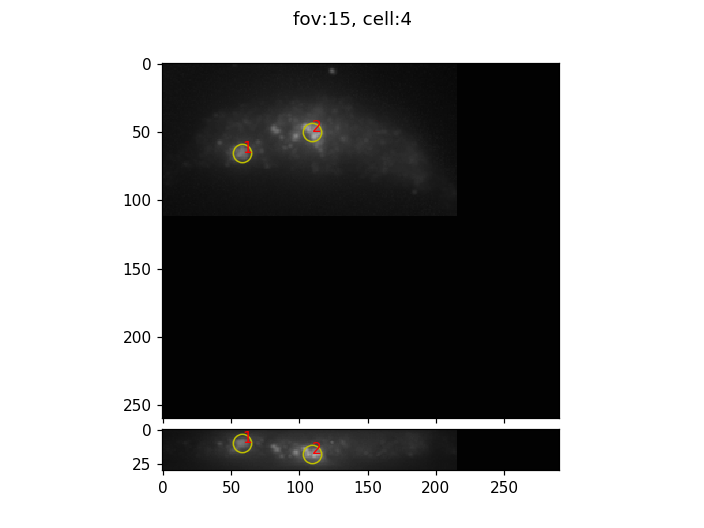

In [7]:
%matplotlib notebook
lst._get_chromosomes_for_cells('combo')

### 3.2 update

In [8]:
lst._update_chromosomes_for_cells()

+ Update manually picked chromosomes to cells
++ matching 2 chromosomes for fov:15, cell:0
- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-0\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-0\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords', 'chrom_im', 'chrom_segmentation', 'chrom_coords']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-0\cell_info.pkl
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-0\group-0\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-0\group-1\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-0\group-2\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-0\group-3\channel-750\ro

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-0\group-14\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-0\group-15\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-0\group-16\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-0\group-17\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-0\group-18\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-0\group-19\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-0\group-20\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x1

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-1\group-6\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-1\group-7\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-1\group-8\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-1\group-9\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-1\group-10\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-1\group-11\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-1\group-12\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fo

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-2\group-20\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-2\group-21\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-2\group-0\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-2\group-1\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-2\group-2\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-2\group-3\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-2\group-4\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-3\group-12\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-3\group-13\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-3\group-14\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-3\group-15\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-3\group-16\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-3\group-17\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-3\group-18\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x1

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-4\group-4\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-4\group-5\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-4\group-6\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-4\group-7\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-4\group-8\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-4\group-9\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-4\group-10\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-5\group-18\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-5\group-19\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-5\group-20\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-5\group-21\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-5\group-0\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-5\group-1\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-5\group-2\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\f

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-6\group-10\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-6\group-11\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-6\group-12\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-6\group-13\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-6\group-14\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-6\group-15\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-6\group-16\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x1

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-7\group-2\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-7\group-3\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-7\group-4\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-7\group-5\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-7\group-6\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-7\group-7\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-7\group-8\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-7\group-20\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-7\group-21\channel-561\rounds.npz	with chrom_coords info.
++ matching 2 chromosomes for fov:15, cell:8
- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-8\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-8\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords', 'chrom_im', 'chrom_segmentation', 'chrom_coords']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-8\cell_info.pkl
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-8\group-0\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-8\group-1\channel-750\rounds.npz	with chrom_coords info.
-- saving c

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-8\group-12\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-8\group-13\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-8\group-14\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-8\group-15\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-8\group-16\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-8\group-17\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-8\group-18\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x1

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-9\group-4\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-9\group-5\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-9\group-6\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-9\group-7\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-9\group-8\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-9\group-9\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-9\group-10\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-10\group-18\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-10\group-19\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-10\group-20\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-10\group-21\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-10\group-0\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-10\group-1\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-10\group-2\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-11\group-10\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-11\group-11\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-11\group-12\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-11\group-13\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-11\group-14\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-11\group-15\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-11\group-16\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analy

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-12\group-2\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-12\group-3\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-12\group-4\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-12\group-5\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-12\group-6\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-12\group-7\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-12\group-8\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x1

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-13\group-16\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-13\group-17\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-13\group-18\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-13\group-19\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-13\group-20\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-13\group-21\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-13\group-0\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analys

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-14\group-8\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-14\group-9\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-14\group-10\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-14\group-11\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-14\group-12\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-14\group-13\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-14\group-14\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysi

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-15\group-0\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-15\group-1\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-15\group-2\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-15\group-3\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-15\group-4\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-15\group-5\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-15\group-6\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x1

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-15\group-17\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-15\group-18\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-15\group-19\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-15\group-20\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-15\group-21\channel-561\rounds.npz	with chrom_coords info.
++ matching 2 chromosomes for fov:15, cell:16
- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-16\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-16\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords', 'chrom_im', 'chrom

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-16\group-9\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-16\group-10\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-16\group-11\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-16\group-12\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-16\group-13\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-16\group-14\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-16\group-15\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analys

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-17\group-1\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-17\group-2\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-17\group-3\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-17\group-4\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-17\group-5\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-17\group-6\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-17\group-7\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x1

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-18\group-15\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-18\group-16\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-18\group-17\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-18\group-18\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-18\group-19\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-18\group-20\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-18\group-21\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analy

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-19\group-7\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-19\group-8\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-19\group-9\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-19\group-10\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-19\group-11\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-19\group-12\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-15\cell-19\group-13\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-0\group-21\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-0\group-0\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-0\group-1\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-0\group-2\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-0\group-3\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-0\group-4\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-0\group-5\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-1\group-13\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-1\group-14\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-1\group-15\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-1\group-16\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-1\group-17\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-1\group-18\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-1\group-19\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x1

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-2\group-5\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-2\group-6\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-2\group-7\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-2\group-8\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-2\group-9\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-2\group-10\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-2\group-11\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov

-- information updated in cell_info.pkl: ['chrom_coords', 'chrom_im', 'chrom_segmentation', 'chrom_coords']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-3\cell_info.pkl
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-3\group-0\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-3\group-1\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-3\group-2\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-3\group-3\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-3\group-4\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-3\group-5\channel-750\rounds.npz	with chrom_coords

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-3\group-16\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-3\group-17\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-3\group-18\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-3\group-19\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-3\group-20\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-3\group-21\channel-561\rounds.npz	with chrom_coords info.
++ matching 2 chromosomes for fov:16, cell:4
- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-4\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whol

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-4\group-8\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-4\group-9\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-4\group-10\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-4\group-11\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-4\group-12\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-4\group-13\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-4\group-14\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-5\group-0\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-5\group-1\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-5\group-2\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-5\group-3\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-5\group-4\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-5\group-5\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-5\group-6\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-6\group-14\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-6\group-15\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-6\group-16\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-6\group-17\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-6\group-18\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-6\group-19\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-6\group-20\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x1

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-7\group-6\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-7\group-7\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-7\group-8\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-7\group-9\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-7\group-10\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-7\group-11\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-7\group-12\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fo

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-8\group-20\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-8\group-21\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-8\group-0\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-8\group-1\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-8\group-2\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-8\group-3\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-8\group-4\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-9\group-12\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-9\group-13\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-9\group-14\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-9\group-15\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-9\group-16\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-9\group-17\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-9\group-18\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x1

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-10\group-4\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-10\group-5\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-10\group-6\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-10\group-7\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-10\group-8\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-10\group-9\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-10\group-10\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-10\group-21\channel-561\rounds.npz	with chrom_coords info.
++ matching 2 chromosomes for fov:16, cell:11
- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-11\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-11\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords', 'chrom_im', 'chrom_segmentation', 'chrom_coords']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-11\cell_info.pkl
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-11\group-0\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-11\group-1\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-11\group-2\channel-750\rounds.npz	with chrom_coords info.
-- s

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-11\group-13\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-11\group-14\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-11\group-15\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-11\group-16\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-11\group-17\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-11\group-18\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-11\group-19\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analy

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-12\group-5\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-12\group-6\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-12\group-7\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-12\group-8\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-12\group-9\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-12\group-10\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-12\group-11\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-13\group-19\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-13\group-20\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-13\group-21\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-13\group-0\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-13\group-1\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-13\group-2\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-13\group-3\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-14\group-11\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-14\group-12\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-14\group-13\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-14\group-14\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-14\group-15\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-14\group-16\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-14\group-17\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analy

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-15\group-3\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-15\group-4\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-15\group-5\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-15\group-6\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-15\group-7\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-15\group-8\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-15\group-9\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x1

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-16\group-17\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-16\group-18\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-16\group-19\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-16\group-20\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-16\group-21\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-16\group-0\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-16\group-1\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysi

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-17\group-9\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-17\group-10\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-17\group-11\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-17\group-12\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-17\group-13\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-17\group-14\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-16\cell-17\group-15\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analys

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-0\group-1\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-0\group-2\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-0\group-3\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-0\group-4\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-0\group-5\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-0\group-6\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-0\group-7\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-0\group-19\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-0\group-20\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-0\group-21\channel-561\rounds.npz	with chrom_coords info.
++ matching 2 chromosomes for fov:17, cell:1
- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-1\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-1\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords', 'chrom_im', 'chrom_segmentation', 'chrom_coords']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-1\cell_info.pkl
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-1\group-0\channel-750\rounds.npz	with chrom_coords info.
-- saving 

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-1\group-11\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-1\group-12\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-1\group-13\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-1\group-14\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-1\group-15\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-1\group-16\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-1\group-17\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x1

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-2\group-3\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-2\group-4\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-2\group-5\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-2\group-6\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-2\group-7\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-2\group-8\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-2\group-9\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-3\group-17\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-3\group-18\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-3\group-19\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-3\group-20\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-3\group-21\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-3\group-0\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-3\group-1\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-4\group-9\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-4\group-10\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-4\group-11\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-4\group-12\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-4\group-13\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-4\group-14\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-4\group-15\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-5\group-1\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-5\group-2\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-5\group-3\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-5\group-4\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-5\group-5\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-5\group-6\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-5\group-7\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-6\group-15\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-6\group-16\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-6\group-17\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-6\group-18\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-6\group-19\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-6\group-20\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-6\group-21\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x1

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-7\group-7\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-7\group-8\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-7\group-9\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-7\group-10\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-7\group-11\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-7\group-12\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-7\group-13\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\f

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-8\group-0\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-8\group-1\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-8\group-2\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-8\group-3\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-8\group-4\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-8\group-5\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-8\group-6\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-8\group-18\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-8\group-19\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-8\group-20\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-8\group-21\channel-561\rounds.npz	with chrom_coords info.
++ matching 2 chromosomes for fov:17, cell:9
- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-9\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-9\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords', 'chrom_im', 'chrom_segmentation', 'chrom_coords']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-9\cell_info.pkl
-- saving

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-9\group-10\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-9\group-11\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-9\group-12\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-9\group-13\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-9\group-14\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-9\group-15\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-9\group-16\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x1

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-10\group-2\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-10\group-3\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-10\group-4\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-10\group-5\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-10\group-6\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-10\group-7\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-10\group-8\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x1

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-11\group-16\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-11\group-17\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-11\group-18\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-11\group-19\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-11\group-20\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-11\group-21\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-11\group-0\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analys

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-12\group-8\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-12\group-9\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-12\group-10\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-12\group-11\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-12\group-12\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-12\group-13\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-12\group-14\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysi

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-13\group-0\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-13\group-1\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-13\group-2\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-13\group-3\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-13\group-4\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-13\group-5\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-13\group-6\channel-647\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x1

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-14\group-14\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-14\group-15\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-14\group-16\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-14\group-17\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-14\group-18\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-14\group-19\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-14\group-20\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analy

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-15\group-6\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-15\group-7\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-15\group-8\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-15\group-9\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-15\group-10\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-15\group-11\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-15\group-12\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\

-- information updated in cell_info.pkl: ['chrom_coords', 'chrom_im', 'chrom_segmentation', 'chrom_coords']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-16\cell_info.pkl
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-16\group-0\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-16\group-1\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-16\group-2\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-16\group-3\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-16\group-4\channel-750\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-16\group-5\channel-750\rounds.npz	with chrom

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-16\group-16\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-16\group-17\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-16\group-18\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-16\group-19\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-16\group-20\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-16\group-21\channel-561\rounds.npz	with chrom_coords info.
++ matching 2 chromosomes for fov:17, cell:17
- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-17\cell_info.pkl
-- loading existing info from file: Z:/20180911-IM

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-17\group-8\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-17\group-9\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-17\group-10\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-17\group-11\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-17\group-12\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-17\group-13\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-17\group-14\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysi

-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-18\group-0\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-18\group-1\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-18\group-2\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-18\group-3\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-18\group-4\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-18\group-5\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-17\cell-18\group-6\channel-561\rounds.npz	with chrom_coords info.
-- saving combo to: Z:/20180911-IMR90_whole-chr21\Analysis\5x1

## 4. multi-fitting for gpu-decoded

To run this part, you have to finish decoding and save them into folders

### Option 1: do multi-fitting for decoded images

### 4.1 Load decoded images (skip this if you have limited RAM)

In [12]:
lst._load_cells_from_files('decoded', _decoded_flag='diff')

+ Load cells from existing files.
++ loading info for fov:0, cell:0
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-0\group-0\channel-561\diff\regions.npz
--- decoded result matched for group:0, color:561
--- kept ids: [4, 43, 84, 139, 202, 235, 275, 308, 414, 510]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-0\group-0\channel-647\diff\regions.npz
--- decoded result matched for group:0, color:647
--- kept ids: [6, 42, 83, 141, 201, 234, 274, 310, 413, 509]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-0\group-0\channel-750\diff\regions.npz
--- decoded result matched for group:0, color:750
--- kept ids: [5, 44, 82, 140, 203, 233, 276, 309, 412, 508]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-0\group-1\channel-561\diff\regions.npz
--- decoded result matched for group:1, color:561
--- k

--- decoded result matched for group:18, color:750
--- kept ids: [136, 194, 230, 273, 351, 439, 570, 592, 596, 651]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-0\group-19\channel-561\diff\regions.npz
--- decoded result matched for group:19, color:561
--- kept ids: [196, 305, 363, 394, 406, 411, 445, 575, 598, 611]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-0\group-19\channel-647\diff\regions.npz
--- decoded result matched for group:19, color:647
--- kept ids: [81, 198, 271, 298, 349, 362, 405, 440, 469, 593]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-0\group-19\channel-750\diff\regions.npz
--- decoded result matched for group:19, color:750
--- kept ids: [41, 80, 197, 446, 471, 567, 573, 599, 612, 633]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-0\group-2\channel-561\diff\regi

--- decoded result matched for group:0, color:561
--- kept ids: [4, 43, 84, 139, 202, 235, 275, 308, 414, 510]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-1\group-0\channel-647\diff\regions.npz
--- decoded result matched for group:0, color:647
--- kept ids: [6, 42, 83, 141, 201, 234, 274, 310, 413, 509]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-1\group-0\channel-750\diff\regions.npz
--- decoded result matched for group:0, color:750
--- kept ids: [5, 44, 82, 140, 203, 233, 276, 309, 412, 508]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-1\group-1\channel-561\diff\regions.npz
--- decoded result matched for group:1, color:561
--- kept ids: [7, 46, 87, 142, 205, 254, 278, 311, 417, 513]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-1\group-1\channel-647\diff\regions.npz
--- decoded 

--- decoded result matched for group:19, color:561
--- kept ids: [196, 305, 363, 394, 406, 411, 445, 575, 598, 611]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-1\group-19\channel-647\diff\regions.npz
--- decoded result matched for group:19, color:647
--- kept ids: [81, 198, 271, 298, 349, 362, 405, 440, 469, 593]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-1\group-19\channel-750\diff\regions.npz
--- decoded result matched for group:19, color:750
--- kept ids: [41, 80, 197, 446, 471, 567, 573, 599, 612, 633]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-1\group-2\channel-561\diff\regions.npz
--- decoded result matched for group:2, color:561
--- kept ids: [10, 49, 90, 145, 208, 281, 314, 420, 489, 516]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-1\group-2\channel-647\diff\regions.n

--- decoded result matched for group:0, color:561
--- kept ids: [4, 43, 84, 139, 202, 235, 275, 308, 414, 510]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-2\group-0\channel-647\diff\regions.npz
--- decoded result matched for group:0, color:647
--- kept ids: [6, 42, 83, 141, 201, 234, 274, 310, 413, 509]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-2\group-0\channel-750\diff\regions.npz
--- decoded result matched for group:0, color:750
--- kept ids: [5, 44, 82, 140, 203, 233, 276, 309, 412, 508]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-2\group-1\channel-561\diff\regions.npz
--- decoded result matched for group:1, color:561
--- kept ids: [7, 46, 87, 142, 205, 254, 278, 311, 417, 513]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-2\group-1\channel-647\diff\regions.npz
--- decoded 

--- decoded result matched for group:19, color:561
--- kept ids: [196, 305, 363, 394, 406, 411, 445, 575, 598, 611]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-2\group-19\channel-647\diff\regions.npz
--- decoded result matched for group:19, color:647
--- kept ids: [81, 198, 271, 298, 349, 362, 405, 440, 469, 593]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-2\group-19\channel-750\diff\regions.npz
--- decoded result matched for group:19, color:750
--- kept ids: [41, 80, 197, 446, 471, 567, 573, 599, 612, 633]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-2\group-2\channel-561\diff\regions.npz
--- decoded result matched for group:2, color:561
--- kept ids: [10, 49, 90, 145, 208, 281, 314, 420, 489, 516]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-2\group-2\channel-647\diff\regions.n

--- decoded result matched for group:0, color:561
--- kept ids: [4, 43, 84, 139, 202, 235, 275, 308, 414, 510]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-3\group-0\channel-647\diff\regions.npz
--- decoded result matched for group:0, color:647
--- kept ids: [6, 42, 83, 141, 201, 234, 274, 310, 413, 509]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-3\group-0\channel-750\diff\regions.npz
--- decoded result matched for group:0, color:750
--- kept ids: [5, 44, 82, 140, 203, 233, 276, 309, 412, 508]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-3\group-1\channel-561\diff\regions.npz
--- decoded result matched for group:1, color:561
--- kept ids: [7, 46, 87, 142, 205, 254, 278, 311, 417, 513]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-3\group-1\channel-647\diff\regions.npz
--- decoded 

--- decoded result matched for group:19, color:561
--- kept ids: [196, 305, 363, 394, 406, 411, 445, 575, 598, 611]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-3\group-19\channel-647\diff\regions.npz
--- decoded result matched for group:19, color:647
--- kept ids: [81, 198, 271, 298, 349, 362, 405, 440, 469, 593]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-3\group-19\channel-750\diff\regions.npz
--- decoded result matched for group:19, color:750
--- kept ids: [41, 80, 197, 446, 471, 567, 573, 599, 612, 633]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-3\group-2\channel-561\diff\regions.npz
--- decoded result matched for group:2, color:561
--- kept ids: [10, 49, 90, 145, 208, 281, 314, 420, 489, 516]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-3\group-2\channel-647\diff\regions.n

--- decoded result matched for group:0, color:561
--- kept ids: [4, 43, 84, 139, 202, 235, 275, 308, 414, 510]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-4\group-0\channel-647\diff\regions.npz
--- decoded result matched for group:0, color:647
--- kept ids: [6, 42, 83, 141, 201, 234, 274, 310, 413, 509]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-4\group-0\channel-750\diff\regions.npz
--- decoded result matched for group:0, color:750
--- kept ids: [5, 44, 82, 140, 203, 233, 276, 309, 412, 508]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-4\group-1\channel-561\diff\regions.npz
--- decoded result matched for group:1, color:561
--- kept ids: [7, 46, 87, 142, 205, 254, 278, 311, 417, 513]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-4\group-1\channel-647\diff\regions.npz
--- decoded 

--- decoded result matched for group:19, color:561
--- kept ids: [196, 305, 363, 394, 406, 411, 445, 575, 598, 611]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-4\group-19\channel-647\diff\regions.npz
--- decoded result matched for group:19, color:647
--- kept ids: [81, 198, 271, 298, 349, 362, 405, 440, 469, 593]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-4\group-19\channel-750\diff\regions.npz
--- decoded result matched for group:19, color:750
--- kept ids: [41, 80, 197, 446, 471, 567, 573, 599, 612, 633]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-4\group-2\channel-561\diff\regions.npz
--- decoded result matched for group:2, color:561
--- kept ids: [10, 49, 90, 145, 208, 281, 314, 420, 489, 516]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-4\group-2\channel-647\diff\regions.n

--- decoded result matched for group:0, color:561
--- kept ids: [4, 43, 84, 139, 202, 235, 275, 308, 414, 510]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-5\group-0\channel-647\diff\regions.npz
--- decoded result matched for group:0, color:647
--- kept ids: [6, 42, 83, 141, 201, 234, 274, 310, 413, 509]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-5\group-0\channel-750\diff\regions.npz
--- decoded result matched for group:0, color:750
--- kept ids: [5, 44, 82, 140, 203, 233, 276, 309, 412, 508]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-5\group-1\channel-561\diff\regions.npz
--- decoded result matched for group:1, color:561
--- kept ids: [7, 46, 87, 142, 205, 254, 278, 311, 417, 513]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-5\group-1\channel-647\diff\regions.npz
--- decoded 

--- decoded result matched for group:19, color:561
--- kept ids: [196, 305, 363, 394, 406, 411, 445, 575, 598, 611]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-5\group-19\channel-647\diff\regions.npz
--- decoded result matched for group:19, color:647
--- kept ids: [81, 198, 271, 298, 349, 362, 405, 440, 469, 593]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-5\group-19\channel-750\diff\regions.npz
--- decoded result matched for group:19, color:750
--- kept ids: [41, 80, 197, 446, 471, 567, 573, 599, 612, 633]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-5\group-2\channel-561\diff\regions.npz
--- decoded result matched for group:2, color:561
--- kept ids: [10, 49, 90, 145, 208, 281, 314, 420, 489, 516]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-5\group-2\channel-647\diff\regions.n

--- decoded result matched for group:0, color:561
--- kept ids: [4, 43, 84, 139, 202, 235, 275, 308, 414, 510]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-6\group-0\channel-647\diff\regions.npz
--- decoded result matched for group:0, color:647
--- kept ids: [6, 42, 83, 141, 201, 234, 274, 310, 413, 509]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-6\group-0\channel-750\diff\regions.npz
--- decoded result matched for group:0, color:750
--- kept ids: [5, 44, 82, 140, 203, 233, 276, 309, 412, 508]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-6\group-1\channel-561\diff\regions.npz
--- decoded result matched for group:1, color:561
--- kept ids: [7, 46, 87, 142, 205, 254, 278, 311, 417, 513]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-6\group-1\channel-647\diff\regions.npz
--- decoded 

--- decoded result matched for group:19, color:561
--- kept ids: [196, 305, 363, 394, 406, 411, 445, 575, 598, 611]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-6\group-19\channel-647\diff\regions.npz
--- decoded result matched for group:19, color:647
--- kept ids: [81, 198, 271, 298, 349, 362, 405, 440, 469, 593]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-6\group-19\channel-750\diff\regions.npz
--- decoded result matched for group:19, color:750
--- kept ids: [41, 80, 197, 446, 471, 567, 573, 599, 612, 633]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-6\group-2\channel-561\diff\regions.npz
--- decoded result matched for group:2, color:561
--- kept ids: [10, 49, 90, 145, 208, 281, 314, 420, 489, 516]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-6\group-2\channel-647\diff\regions.n

--- decoded result matched for group:0, color:561
--- kept ids: [4, 43, 84, 139, 202, 235, 275, 308, 414, 510]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-7\group-0\channel-647\diff\regions.npz
--- decoded result matched for group:0, color:647
--- kept ids: [6, 42, 83, 141, 201, 234, 274, 310, 413, 509]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-7\group-0\channel-750\diff\regions.npz
--- decoded result matched for group:0, color:750
--- kept ids: [5, 44, 82, 140, 203, 233, 276, 309, 412, 508]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-7\group-1\channel-561\diff\regions.npz
--- decoded result matched for group:1, color:561
--- kept ids: [7, 46, 87, 142, 205, 254, 278, 311, 417, 513]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-7\group-1\channel-647\diff\regions.npz
--- decoded 

--- decoded result matched for group:19, color:561
--- kept ids: [196, 305, 363, 394, 406, 411, 445, 575, 598, 611]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-7\group-19\channel-647\diff\regions.npz
--- decoded result matched for group:19, color:647
--- kept ids: [81, 198, 271, 298, 349, 362, 405, 440, 469, 593]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-7\group-19\channel-750\diff\regions.npz
--- decoded result matched for group:19, color:750
--- kept ids: [41, 80, 197, 446, 471, 567, 573, 599, 612, 633]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-7\group-2\channel-561\diff\regions.npz
--- decoded result matched for group:2, color:561
--- kept ids: [10, 49, 90, 145, 208, 281, 314, 420, 489, 516]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-7\group-2\channel-647\diff\regions.n

--- decoded result matched for group:0, color:561
--- kept ids: [4, 43, 84, 139, 202, 235, 275, 308, 414, 510]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-8\group-0\channel-647\diff\regions.npz
--- decoded result matched for group:0, color:647
--- kept ids: [6, 42, 83, 141, 201, 234, 274, 310, 413, 509]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-8\group-0\channel-750\diff\regions.npz
--- decoded result matched for group:0, color:750
--- kept ids: [5, 44, 82, 140, 203, 233, 276, 309, 412, 508]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-8\group-1\channel-561\diff\regions.npz
--- decoded result matched for group:1, color:561
--- kept ids: [7, 46, 87, 142, 205, 254, 278, 311, 417, 513]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-8\group-1\channel-647\diff\regions.npz
--- decoded 

--- decoded result matched for group:19, color:561
--- kept ids: [196, 305, 363, 394, 406, 411, 445, 575, 598, 611]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-8\group-19\channel-647\diff\regions.npz
--- decoded result matched for group:19, color:647
--- kept ids: [81, 198, 271, 298, 349, 362, 405, 440, 469, 593]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-8\group-19\channel-750\diff\regions.npz
--- decoded result matched for group:19, color:750
--- kept ids: [41, 80, 197, 446, 471, 567, 573, 599, 612, 633]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-8\group-2\channel-561\diff\regions.npz
--- decoded result matched for group:2, color:561
--- kept ids: [10, 49, 90, 145, 208, 281, 314, 420, 489, 516]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-8\group-2\channel-647\diff\regions.n

--- decoded result matched for group:0, color:561
--- kept ids: [4, 43, 84, 139, 202, 235, 275, 308, 414, 510]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-9\group-0\channel-647\diff\regions.npz
--- decoded result matched for group:0, color:647
--- kept ids: [6, 42, 83, 141, 201, 234, 274, 310, 413, 509]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-9\group-0\channel-750\diff\regions.npz
--- decoded result matched for group:0, color:750
--- kept ids: [5, 44, 82, 140, 203, 233, 276, 309, 412, 508]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-9\group-1\channel-561\diff\regions.npz
--- decoded result matched for group:1, color:561
--- kept ids: [7, 46, 87, 142, 205, 254, 278, 311, 417, 513]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-9\group-1\channel-647\diff\regions.npz
--- decoded 

--- decoded result matched for group:19, color:561
--- kept ids: [196, 305, 363, 394, 406, 411, 445, 575, 598, 611]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-9\group-19\channel-647\diff\regions.npz
--- decoded result matched for group:19, color:647
--- kept ids: [81, 198, 271, 298, 349, 362, 405, 440, 469, 593]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-9\group-19\channel-750\diff\regions.npz
--- decoded result matched for group:19, color:750
--- kept ids: [41, 80, 197, 446, 471, 567, 573, 599, 612, 633]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-9\group-2\channel-561\diff\regions.npz
--- decoded result matched for group:2, color:561
--- kept ids: [10, 49, 90, 145, 208, 281, 314, 420, 489, 516]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-9\group-2\channel-647\diff\regions.n

--- decoded result matched for group:0, color:561
--- kept ids: [4, 43, 84, 139, 202, 235, 275, 308, 414, 510]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-10\group-0\channel-647\diff\regions.npz
--- decoded result matched for group:0, color:647
--- kept ids: [6, 42, 83, 141, 201, 234, 274, 310, 413, 509]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-10\group-0\channel-750\diff\regions.npz
--- decoded result matched for group:0, color:750
--- kept ids: [5, 44, 82, 140, 203, 233, 276, 309, 412, 508]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-10\group-1\channel-561\diff\regions.npz
--- decoded result matched for group:1, color:561
--- kept ids: [7, 46, 87, 142, 205, 254, 278, 311, 417, 513]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-10\group-1\channel-647\diff\regions.npz
--- deco

--- decoded result matched for group:19, color:561
--- kept ids: [196, 305, 363, 394, 406, 411, 445, 575, 598, 611]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-10\group-19\channel-647\diff\regions.npz
--- decoded result matched for group:19, color:647
--- kept ids: [81, 198, 271, 298, 349, 362, 405, 440, 469, 593]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-10\group-19\channel-750\diff\regions.npz
--- decoded result matched for group:19, color:750
--- kept ids: [41, 80, 197, 446, 471, 567, 573, 599, 612, 633]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-10\group-2\channel-561\diff\regions.npz
--- decoded result matched for group:2, color:561
--- kept ids: [10, 49, 90, 145, 208, 281, 314, 420, 489, 516]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-10\group-2\channel-647\diff\regio

--- decoded result matched for group:0, color:561
--- kept ids: [4, 43, 84, 139, 202, 235, 275, 308, 414, 510]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-11\group-0\channel-647\diff\regions.npz
--- decoded result matched for group:0, color:647
--- kept ids: [6, 42, 83, 141, 201, 234, 274, 310, 413, 509]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-11\group-0\channel-750\diff\regions.npz
--- decoded result matched for group:0, color:750
--- kept ids: [5, 44, 82, 140, 203, 233, 276, 309, 412, 508]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-11\group-1\channel-561\diff\regions.npz
--- decoded result matched for group:1, color:561
--- kept ids: [7, 46, 87, 142, 205, 254, 278, 311, 417, 513]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-11\group-1\channel-647\diff\regions.npz
--- deco

--- decoded result matched for group:19, color:561
--- kept ids: [196, 305, 363, 394, 406, 411, 445, 575, 598, 611]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-11\group-19\channel-647\diff\regions.npz
--- decoded result matched for group:19, color:647
--- kept ids: [81, 198, 271, 298, 349, 362, 405, 440, 469, 593]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-11\group-19\channel-750\diff\regions.npz
--- decoded result matched for group:19, color:750
--- kept ids: [41, 80, 197, 446, 471, 567, 573, 599, 612, 633]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-11\group-2\channel-561\diff\regions.npz
--- decoded result matched for group:2, color:561
--- kept ids: [10, 49, 90, 145, 208, 281, 314, 420, 489, 516]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-11\group-2\channel-647\diff\regio

--- decoded result matched for group:0, color:561
--- kept ids: [4, 43, 84, 139, 202, 235, 275, 308, 414, 510]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-12\group-0\channel-647\diff\regions.npz
--- decoded result matched for group:0, color:647
--- kept ids: [6, 42, 83, 141, 201, 234, 274, 310, 413, 509]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-12\group-0\channel-750\diff\regions.npz
--- decoded result matched for group:0, color:750
--- kept ids: [5, 44, 82, 140, 203, 233, 276, 309, 412, 508]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-12\group-1\channel-561\diff\regions.npz
--- decoded result matched for group:1, color:561
--- kept ids: [7, 46, 87, 142, 205, 254, 278, 311, 417, 513]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-12\group-1\channel-647\diff\regions.npz
--- deco

--- decoded result matched for group:19, color:561
--- kept ids: [196, 305, 363, 394, 406, 411, 445, 575, 598, 611]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-12\group-19\channel-647\diff\regions.npz
--- decoded result matched for group:19, color:647
--- kept ids: [81, 198, 271, 298, 349, 362, 405, 440, 469, 593]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-12\group-19\channel-750\diff\regions.npz
--- decoded result matched for group:19, color:750
--- kept ids: [41, 80, 197, 446, 471, 567, 573, 599, 612, 633]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-12\group-2\channel-561\diff\regions.npz
--- decoded result matched for group:2, color:561
--- kept ids: [10, 49, 90, 145, 208, 281, 314, 420, 489, 516]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-12\group-2\channel-647\diff\regio

--- decoded result matched for group:0, color:561
--- kept ids: [4, 43, 84, 139, 202, 235, 275, 308, 414, 510]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-13\group-0\channel-647\diff\regions.npz
--- decoded result matched for group:0, color:647
--- kept ids: [6, 42, 83, 141, 201, 234, 274, 310, 413, 509]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-13\group-0\channel-750\diff\regions.npz
--- decoded result matched for group:0, color:750
--- kept ids: [5, 44, 82, 140, 203, 233, 276, 309, 412, 508]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-13\group-1\channel-561\diff\regions.npz
--- decoded result matched for group:1, color:561
--- kept ids: [7, 46, 87, 142, 205, 254, 278, 311, 417, 513]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-13\group-1\channel-647\diff\regions.npz
--- deco

--- decoded result matched for group:19, color:561
--- kept ids: [196, 305, 363, 394, 406, 411, 445, 575, 598, 611]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-13\group-19\channel-647\diff\regions.npz
--- decoded result matched for group:19, color:647
--- kept ids: [81, 198, 271, 298, 349, 362, 405, 440, 469, 593]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-13\group-19\channel-750\diff\regions.npz
--- decoded result matched for group:19, color:750
--- kept ids: [41, 80, 197, 446, 471, 567, 573, 599, 612, 633]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-13\group-2\channel-561\diff\regions.npz
--- decoded result matched for group:2, color:561
--- kept ids: [10, 49, 90, 145, 208, 281, 314, 420, 489, 516]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-13\group-2\channel-647\diff\regio

--- decoded result matched for group:0, color:561
--- kept ids: [4, 43, 84, 139, 202, 235, 275, 308, 414, 510]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-14\group-0\channel-647\diff\regions.npz
--- decoded result matched for group:0, color:647
--- kept ids: [6, 42, 83, 141, 201, 234, 274, 310, 413, 509]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-14\group-0\channel-750\diff\regions.npz
--- decoded result matched for group:0, color:750
--- kept ids: [5, 44, 82, 140, 203, 233, 276, 309, 412, 508]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-14\group-1\channel-561\diff\regions.npz
--- decoded result matched for group:1, color:561
--- kept ids: [7, 46, 87, 142, 205, 254, 278, 311, 417, 513]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-14\group-1\channel-647\diff\regions.npz
--- deco

--- decoded result matched for group:19, color:561
--- kept ids: [196, 305, 363, 394, 406, 411, 445, 575, 598, 611]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-14\group-19\channel-647\diff\regions.npz
--- decoded result matched for group:19, color:647
--- kept ids: [81, 198, 271, 298, 349, 362, 405, 440, 469, 593]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-14\group-19\channel-750\diff\regions.npz
--- decoded result matched for group:19, color:750
--- kept ids: [41, 80, 197, 446, 471, 567, 573, 599, 612, 633]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-14\group-2\channel-561\diff\regions.npz
--- decoded result matched for group:2, color:561
--- kept ids: [10, 49, 90, 145, 208, 281, 314, 420, 489, 516]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-14\group-2\channel-647\diff\regio

--- decoded result matched for group:0, color:561
--- kept ids: [4, 43, 84, 139, 202, 235, 275, 308, 414, 510]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-15\group-0\channel-647\diff\regions.npz
--- decoded result matched for group:0, color:647
--- kept ids: [6, 42, 83, 141, 201, 234, 274, 310, 413, 509]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-15\group-0\channel-750\diff\regions.npz
--- decoded result matched for group:0, color:750
--- kept ids: [5, 44, 82, 140, 203, 233, 276, 309, 412, 508]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-15\group-1\channel-561\diff\regions.npz
--- decoded result matched for group:1, color:561
--- kept ids: [7, 46, 87, 142, 205, 254, 278, 311, 417, 513]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-15\group-1\channel-647\diff\regions.npz
--- deco

--- decoded result matched for group:19, color:561
--- kept ids: [196, 305, 363, 394, 406, 411, 445, 575, 598, 611]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-15\group-19\channel-647\diff\regions.npz
--- decoded result matched for group:19, color:647
--- kept ids: [81, 198, 271, 298, 349, 362, 405, 440, 469, 593]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-15\group-19\channel-750\diff\regions.npz
--- decoded result matched for group:19, color:750
--- kept ids: [41, 80, 197, 446, 471, 567, 573, 599, 612, 633]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-15\group-2\channel-561\diff\regions.npz
--- decoded result matched for group:2, color:561
--- kept ids: [10, 49, 90, 145, 208, 281, 314, 420, 489, 516]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-15\group-2\channel-647\diff\regio

--- decoded result matched for group:0, color:561
--- kept ids: [4, 43, 84, 139, 202, 235, 275, 308, 414, 510]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-16\group-0\channel-647\diff\regions.npz
--- decoded result matched for group:0, color:647
--- kept ids: [6, 42, 83, 141, 201, 234, 274, 310, 413, 509]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-16\group-0\channel-750\diff\regions.npz
--- decoded result matched for group:0, color:750
--- kept ids: [5, 44, 82, 140, 203, 233, 276, 309, 412, 508]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-16\group-1\channel-561\diff\regions.npz
--- decoded result matched for group:1, color:561
--- kept ids: [7, 46, 87, 142, 205, 254, 278, 311, 417, 513]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-16\group-1\channel-647\diff\regions.npz
--- deco

--- decoded result matched for group:19, color:561
--- kept ids: [196, 305, 363, 394, 406, 411, 445, 575, 598, 611]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-16\group-19\channel-647\diff\regions.npz
--- decoded result matched for group:19, color:647
--- kept ids: [81, 198, 271, 298, 349, 362, 405, 440, 469, 593]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-16\group-19\channel-750\diff\regions.npz
--- decoded result matched for group:19, color:750
--- kept ids: [41, 80, 197, 446, 471, 567, 573, 599, 612, 633]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-16\group-2\channel-561\diff\regions.npz
--- decoded result matched for group:2, color:561
--- kept ids: [10, 49, 90, 145, 208, 281, 314, 420, 489, 516]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-16\group-2\channel-647\diff\regio

--- decoded result matched for group:0, color:561
--- kept ids: [4, 43, 84, 139, 202, 235, 275, 308, 414, 510]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-17\group-0\channel-647\diff\regions.npz
--- decoded result matched for group:0, color:647
--- kept ids: [6, 42, 83, 141, 201, 234, 274, 310, 413, 509]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-17\group-0\channel-750\diff\regions.npz
--- decoded result matched for group:0, color:750
--- kept ids: [5, 44, 82, 140, 203, 233, 276, 309, 412, 508]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-17\group-1\channel-561\diff\regions.npz
--- decoded result matched for group:1, color:561
--- kept ids: [7, 46, 87, 142, 205, 254, 278, 311, 417, 513]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-17\group-1\channel-647\diff\regions.npz
--- deco

--- decoded result matched for group:19, color:561
--- kept ids: [196, 305, 363, 394, 406, 411, 445, 575, 598, 611]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-17\group-19\channel-647\diff\regions.npz
--- decoded result matched for group:19, color:647
--- kept ids: [81, 198, 271, 298, 349, 362, 405, 440, 469, 593]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-17\group-19\channel-750\diff\regions.npz
--- decoded result matched for group:19, color:750
--- kept ids: [41, 80, 197, 446, 471, 567, 573, 599, 612, 633]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-17\group-2\channel-561\diff\regions.npz
--- decoded result matched for group:2, color:561
--- kept ids: [10, 49, 90, 145, 208, 281, 314, 420, 489, 516]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-17\group-2\channel-647\diff\regio

--- decoded result matched for group:0, color:561
--- kept ids: [4, 43, 84, 139, 202, 235, 275, 308, 414, 510]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-18\group-0\channel-647\diff\regions.npz
--- decoded result matched for group:0, color:647
--- kept ids: [6, 42, 83, 141, 201, 234, 274, 310, 413, 509]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-18\group-0\channel-750\diff\regions.npz
--- decoded result matched for group:0, color:750
--- kept ids: [5, 44, 82, 140, 203, 233, 276, 309, 412, 508]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-18\group-1\channel-561\diff\regions.npz
--- decoded result matched for group:1, color:561
--- kept ids: [7, 46, 87, 142, 205, 254, 278, 311, 417, 513]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-18\group-1\channel-647\diff\regions.npz
--- deco

--- decoded result matched for group:19, color:561
--- kept ids: [196, 305, 363, 394, 406, 411, 445, 575, 598, 611]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-18\group-19\channel-647\diff\regions.npz
--- decoded result matched for group:19, color:647
--- kept ids: [81, 198, 271, 298, 349, 362, 405, 440, 469, 593]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-18\group-19\channel-750\diff\regions.npz
--- decoded result matched for group:19, color:750
--- kept ids: [41, 80, 197, 446, 471, 567, 573, 599, 612, 633]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-18\group-2\channel-561\diff\regions.npz
--- decoded result matched for group:2, color:561
--- kept ids: [10, 49, 90, 145, 208, 281, 314, 420, 489, 516]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-18\group-2\channel-647\diff\regio

--- decoded result matched for group:0, color:561
--- kept ids: [4, 43, 84, 139, 202, 235, 275, 308, 414, 510]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-19\group-0\channel-647\diff\regions.npz
--- decoded result matched for group:0, color:647
--- kept ids: [6, 42, 83, 141, 201, 234, 274, 310, 413, 509]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-19\group-0\channel-750\diff\regions.npz
--- decoded result matched for group:0, color:750
--- kept ids: [5, 44, 82, 140, 203, 233, 276, 309, 412, 508]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-19\group-1\channel-561\diff\regions.npz
--- decoded result matched for group:1, color:561
--- kept ids: [7, 46, 87, 142, 205, 254, 278, 311, 417, 513]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-19\group-1\channel-647\diff\regions.npz
--- deco

--- decoded result matched for group:19, color:561
--- kept ids: [196, 305, 363, 394, 406, 411, 445, 575, 598, 611]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-19\group-19\channel-647\diff\regions.npz
--- decoded result matched for group:19, color:647
--- kept ids: [81, 198, 271, 298, 349, 362, 405, 440, 469, 593]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-19\group-19\channel-750\diff\regions.npz
--- decoded result matched for group:19, color:750
--- kept ids: [41, 80, 197, 446, 471, 567, 573, 599, 612, 633]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-19\group-2\channel-561\diff\regions.npz
--- decoded result matched for group:2, color:561
--- kept ids: [10, 49, 90, 145, 208, 281, 314, 420, 489, 516]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-19\group-2\channel-647\diff\regio

--- decoded result matched for group:0, color:561
--- kept ids: [4, 43, 84, 139, 202, 235, 275, 308, 414, 510]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-21\group-0\channel-647\diff\regions.npz
--- decoded result matched for group:0, color:647
--- kept ids: [6, 42, 83, 141, 201, 234, 274, 310, 413, 509]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-21\group-0\channel-750\diff\regions.npz
--- decoded result matched for group:0, color:750
--- kept ids: [5, 44, 82, 140, 203, 233, 276, 309, 412, 508]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-21\group-1\channel-561\diff\regions.npz
--- decoded result matched for group:1, color:561
--- kept ids: [7, 46, 87, 142, 205, 254, 278, 311, 417, 513]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-21\group-1\channel-647\diff\regions.npz
--- deco

--- decoded result matched for group:19, color:561
--- kept ids: [196, 305, 363, 394, 406, 411, 445, 575, 598, 611]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-21\group-19\channel-647\diff\regions.npz
--- decoded result matched for group:19, color:647
--- kept ids: [81, 198, 271, 298, 349, 362, 405, 440, 469, 593]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-21\group-19\channel-750\diff\regions.npz
--- decoded result matched for group:19, color:750
--- kept ids: [41, 80, 197, 446, 471, 567, 573, 599, 612, 633]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-21\group-2\channel-561\diff\regions.npz
--- decoded result matched for group:2, color:561
--- kept ids: [10, 49, 90, 145, 208, 281, 314, 420, 489, 516]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-21\group-2\channel-647\diff\regio

### 4.2 spot-finding

In [ ]:
lst._spot_finding_for_cells('decoded', _max_fitting_threads=10, _save=True)

+ Start multi-fitting for decoded images
++ start fitting decoded for fov:0, cell:0 with 10 threads
++ total time in fitting decoded: 1869.7155847549438
- Save cell_info to: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-0\cell_info.pkl
-- information updated in cell_info.pkl: ['analysis_folder', 'annotated_folders', 'bead_channel_index', 'cell_id', 'channels', 'chrom_coords', 'color_dic', 'correction_folder', 'dapi_channel_index', 'dapi_im', 'data_folder', 'decoded_ids', 'decoded_spots', 'distance_reference', 'distance_zxy', 'drift', 'drift_folder', 'encoding_colors', 'encoding_group_nums', 'encoding_scheme', 'folders', 'fov_id', 'fovs', 'hyb_per_group', 'map_folder', 'reg_per_group', 'save_folder', 'segmentation_folder', 'segmentation_label', 'sigma_zxy', 'temp_folder', 'use_dapi', 'decoded_spots']
- Writing cell data to file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-0\cell-0\cell_info.pkl
+ Start multi-fitting for decoded images
++ start fitting decoded for 

### 4.3 pick spots

In [ ]:
lst._pick_spots_for_cells('decoded', _pick_type='naive', _w_dist=2, _save=False)

In [ ]:
lst._pick_spots_for_cells('decoded', _pick_type='dynamic', _w_dist=2, _save=True)

### Option 2: do multi-fitting for unique images

In [ ]:
lst._load_cells_from_files('unique', _decoded_flag='diff')

In [ ]:
lst._spot_finding_for_cells('unique', _max_fitting_threads=6, _save=True)

+ Pick spots and convert to distmap.
++ picking spots for cell:0 by naive method:
+ Pick unique spots for by brightness in fov:1, cell:0
+++ generating distance map for cell:0
++ generate unique dist-map for fov:1, cell:0, chrom:0


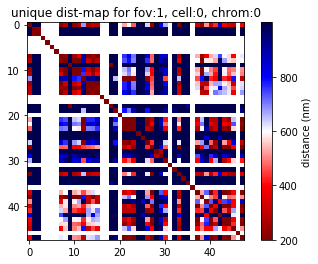

++ generate unique dist-map for fov:1, cell:0, chrom:1


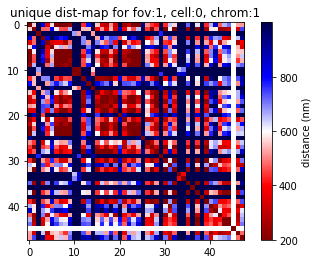

++ picking spots for cell:1 by naive method:
+ Pick unique spots for by brightness in fov:1, cell:1
+++ generating distance map for cell:1
++ generate unique dist-map for fov:1, cell:1, chrom:0


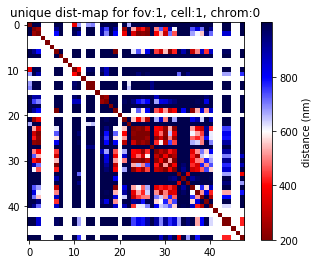

++ generate unique dist-map for fov:1, cell:1, chrom:1


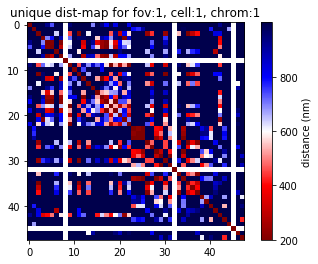

++ picking spots for cell:2 by naive method:
+ Pick unique spots for by brightness in fov:1, cell:2
+++ generating distance map for cell:2
++ generate unique dist-map for fov:1, cell:2, chrom:0


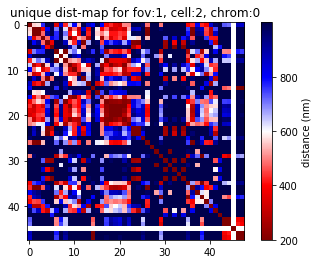

++ picking spots for cell:3 by naive method:
+ Pick unique spots for by brightness in fov:1, cell:3
+++ generating distance map for cell:3
++ generate unique dist-map for fov:1, cell:3, chrom:0


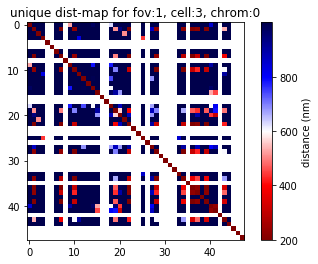

++ generate unique dist-map for fov:1, cell:3, chrom:1


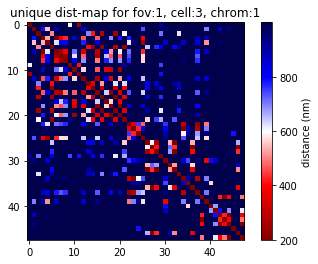

++ picking spots for cell:4 by naive method:
+ Pick unique spots for by brightness in fov:1, cell:4
+++ generating distance map for cell:4
++ generate unique dist-map for fov:1, cell:4, chrom:0


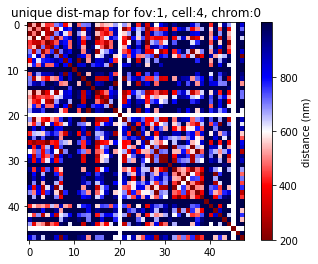

++ generate unique dist-map for fov:1, cell:4, chrom:1


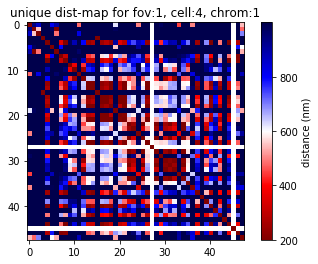

++ picking spots for cell:5 by naive method:
+ Pick unique spots for by brightness in fov:1, cell:5
+++ generating distance map for cell:5
++ generate unique dist-map for fov:1, cell:5, chrom:0


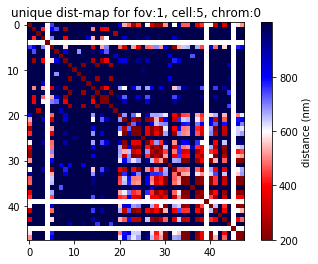

++ generate unique dist-map for fov:1, cell:5, chrom:1


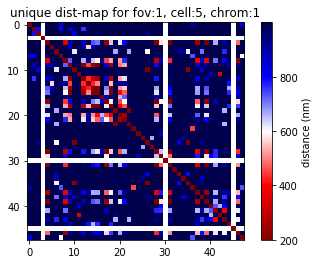

++ picking spots for cell:6 by naive method:
+ Pick unique spots for by brightness in fov:1, cell:6
+++ generating distance map for cell:6
++ generate unique dist-map for fov:1, cell:6, chrom:0


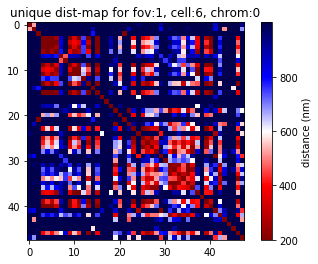

++ generate unique dist-map for fov:1, cell:6, chrom:1


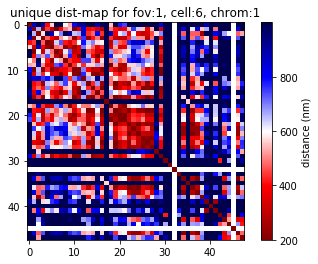

++ picking spots for cell:7 by naive method:
+ Pick unique spots for by brightness in fov:1, cell:7
+++ generating distance map for cell:7
++ generate unique dist-map for fov:1, cell:7, chrom:0


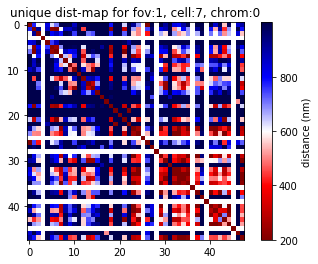

++ generate unique dist-map for fov:1, cell:7, chrom:1


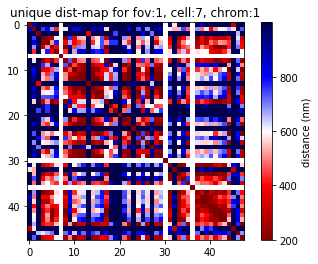

++ picking spots for cell:8 by naive method:
+ Pick unique spots for by brightness in fov:1, cell:8
+++ generating distance map for cell:8
++ generate unique dist-map for fov:1, cell:8, chrom:0


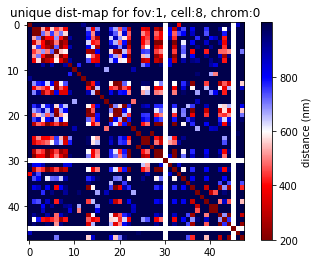

++ generate unique dist-map for fov:1, cell:8, chrom:1


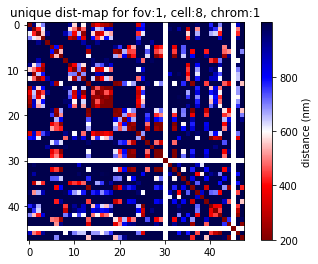

++ picking spots for cell:9 by naive method:
+ Pick unique spots for by brightness in fov:1, cell:9
+++ generating distance map for cell:9
++ generate unique dist-map for fov:1, cell:9, chrom:0


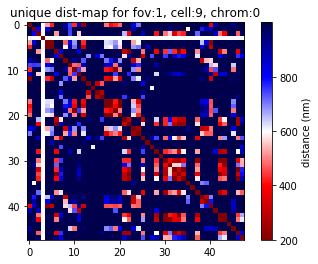

++ picking spots for cell:10 by naive method:
+ Pick unique spots for by brightness in fov:1, cell:10
+++ generating distance map for cell:10
++ generate unique dist-map for fov:1, cell:10, chrom:0


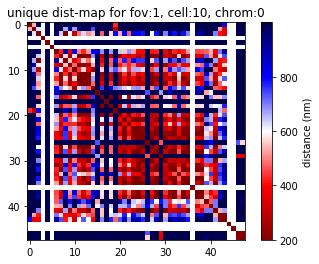

++ generate unique dist-map for fov:1, cell:10, chrom:1


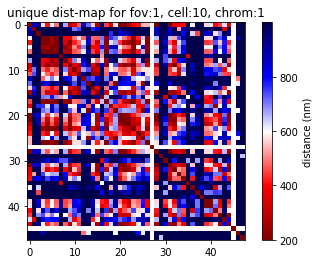

++ picking spots for cell:11 by naive method:
+ Pick unique spots for by brightness in fov:1, cell:11
+++ generating distance map for cell:11
++ generate unique dist-map for fov:1, cell:11, chrom:0


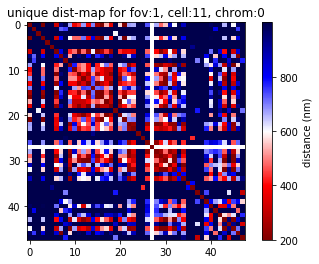

++ generate unique dist-map for fov:1, cell:11, chrom:1


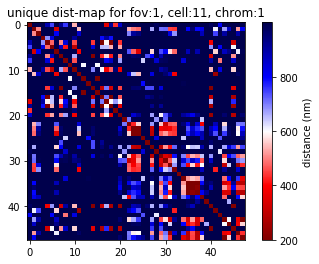

++ picking spots for cell:12 by naive method:
+ Pick unique spots for by brightness in fov:1, cell:12
+++ generating distance map for cell:12
++ generate unique dist-map for fov:1, cell:12, chrom:0


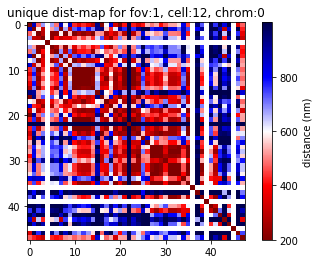

++ generate unique dist-map for fov:1, cell:12, chrom:1


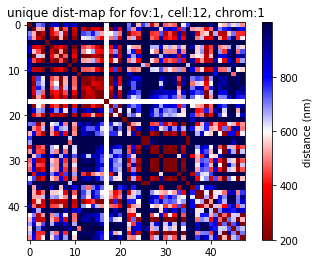

++ picking spots for cell:13 by naive method:
+ Pick unique spots for by brightness in fov:1, cell:13
+++ generating distance map for cell:13
++ generate unique dist-map for fov:1, cell:13, chrom:0


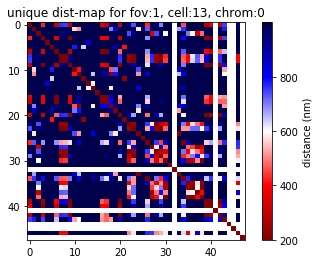

++ generate unique dist-map for fov:1, cell:13, chrom:1


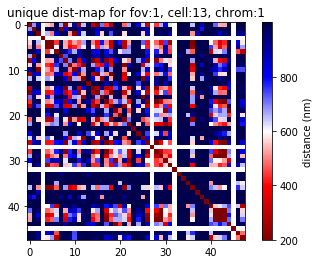

++ picking spots for cell:14 by naive method:
+ Pick unique spots for by brightness in fov:1, cell:14
+++ generating distance map for cell:14
++ picking spots for cell:15 by naive method:
+ Pick unique spots for by brightness in fov:1, cell:15
+++ generating distance map for cell:15
++ generate unique dist-map for fov:1, cell:15, chrom:0


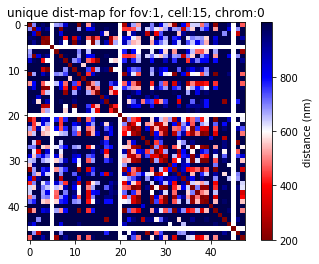

++ generate unique dist-map for fov:1, cell:15, chrom:1


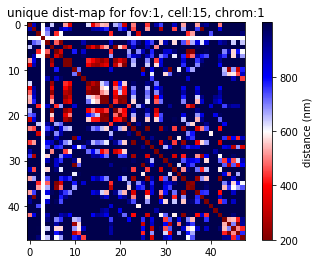

++ picking spots for cell:16 by naive method:
+ Pick unique spots for by brightness in fov:1, cell:16
+++ generating distance map for cell:16
++ generate unique dist-map for fov:1, cell:16, chrom:0


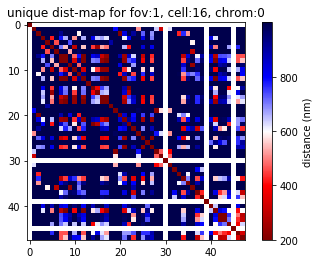

++ generate unique dist-map for fov:1, cell:16, chrom:1


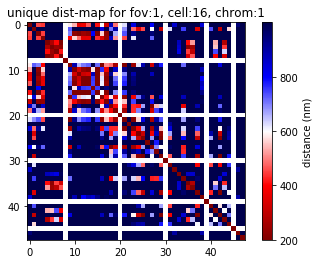

++ picking spots for cell:17 by naive method:
+ Pick unique spots for by brightness in fov:1, cell:17
+++ generating distance map for cell:17
++ generate unique dist-map for fov:1, cell:17, chrom:0


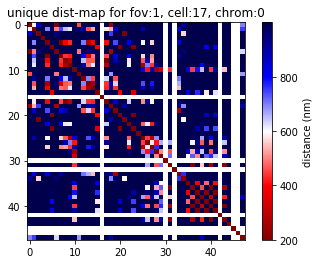

++ generate unique dist-map for fov:1, cell:17, chrom:1


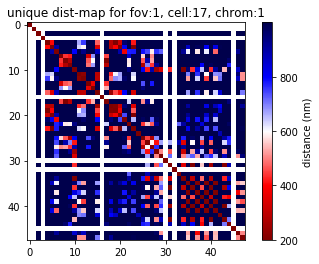

++ picking spots for cell:18 by naive method:
+ Pick unique spots for by brightness in fov:1, cell:18
+++ generating distance map for cell:18
++ picking spots for cell:19 by naive method:
+ Pick unique spots for by brightness in fov:1, cell:19
+++ generating distance map for cell:19
++ generate unique dist-map for fov:1, cell:19, chrom:0


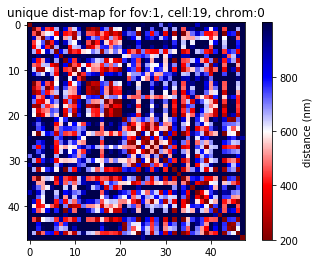

++ picking spots for cell:20 by naive method:
+ Pick unique spots for by brightness in fov:1, cell:20
+++ generating distance map for cell:20
++ generate unique dist-map for fov:1, cell:20, chrom:0


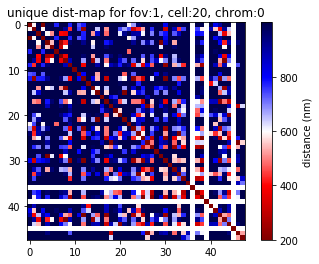

++ generate unique dist-map for fov:1, cell:20, chrom:1


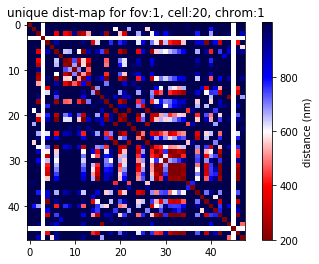

++ picking spots for cell:21 by naive method:
+ Pick unique spots for by brightness in fov:1, cell:21
+++ generating distance map for cell:21
++ generate unique dist-map for fov:1, cell:21, chrom:0


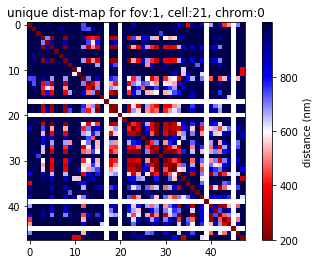

++ generate unique dist-map for fov:1, cell:21, chrom:1


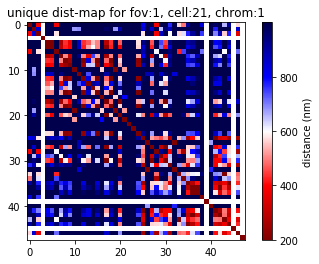

++ picking spots for cell:22 by naive method:
+ Pick unique spots for by brightness in fov:1, cell:22
+++ generating distance map for cell:22
++ picking spots for cell:23 by naive method:
+ Pick unique spots for by brightness in fov:1, cell:23
+++ generating distance map for cell:23
++ generate unique dist-map for fov:1, cell:23, chrom:0


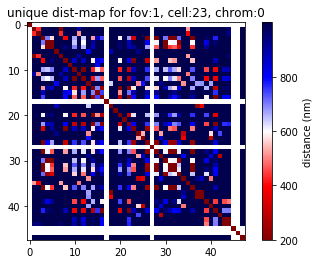

++ generate unique dist-map for fov:1, cell:23, chrom:1


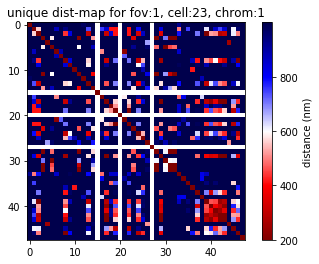

++ picking spots for cell:24 by naive method:
+ Pick unique spots for by brightness in fov:1, cell:24
+++ generating distance map for cell:24
++ generate unique dist-map for fov:1, cell:24, chrom:0


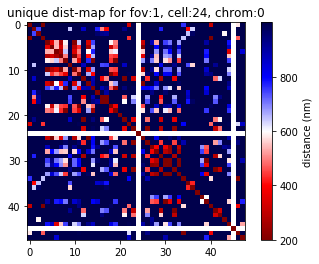

++ picking spots for cell:25 by naive method:
+ Pick unique spots for by brightness in fov:1, cell:25
+++ generating distance map for cell:25
++ generate unique dist-map for fov:1, cell:25, chrom:0


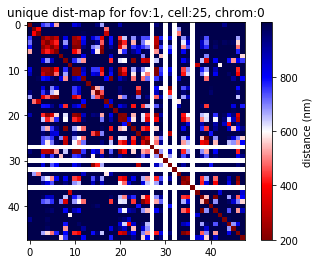

++ generate unique dist-map for fov:1, cell:25, chrom:1


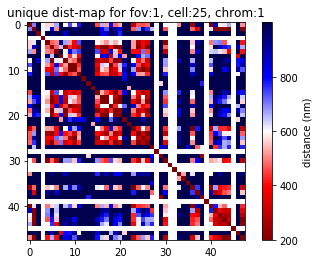

++ picking spots for cell:26 by naive method:
+ Pick unique spots for by brightness in fov:1, cell:26
+++ generating distance map for cell:26
++ generate unique dist-map for fov:1, cell:26, chrom:0


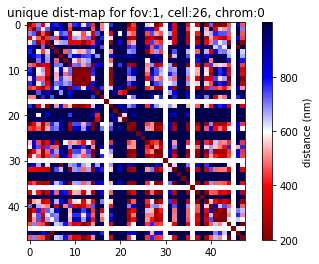

++ generate unique dist-map for fov:1, cell:26, chrom:1


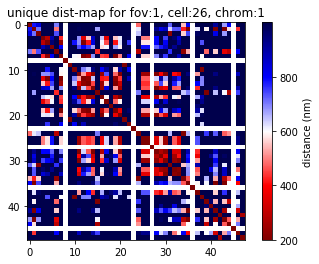

++ picking spots for cell:27 by naive method:
+ Pick unique spots for by brightness in fov:1, cell:27
+++ generating distance map for cell:27
++ generate unique dist-map for fov:1, cell:27, chrom:0


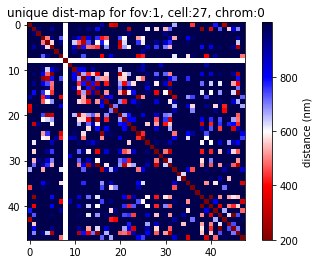

++ picking spots for cell:28 by naive method:
+ Pick unique spots for by brightness in fov:1, cell:28
+++ generating distance map for cell:28
++ generate unique dist-map for fov:1, cell:28, chrom:0


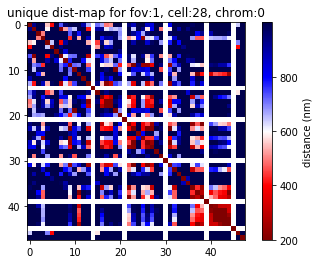

++ generate unique dist-map for fov:1, cell:28, chrom:1


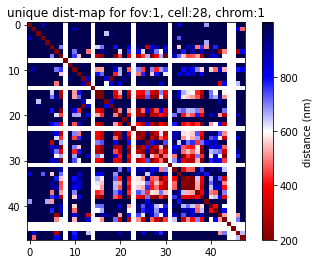

++ picking spots for cell:29 by naive method:
+ Pick unique spots for by brightness in fov:1, cell:29
+++ generating distance map for cell:29
++ generate unique dist-map for fov:1, cell:29, chrom:0


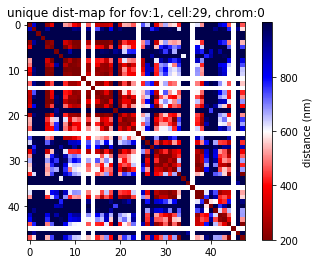

++ generate unique dist-map for fov:1, cell:29, chrom:1


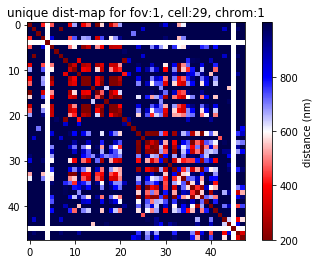

++ picking spots for cell:30 by naive method:
+ Pick unique spots for by brightness in fov:1, cell:30
+++ generating distance map for cell:30
++ generate unique dist-map for fov:1, cell:30, chrom:0


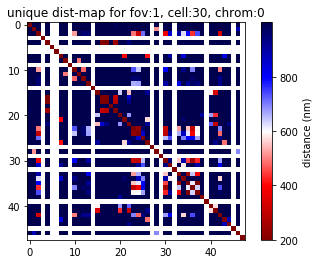

++ generate unique dist-map for fov:1, cell:30, chrom:1


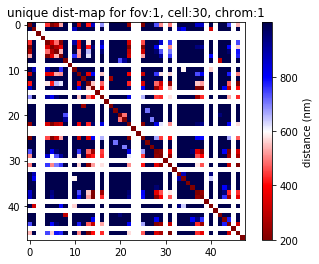

In [13]:
lst._pick_spots_for_cells('unique', _pick_type='naive', _w_dist=2, _save=False)

+ Pick spots and convert to distmap.
++ picking spots for cell:0 by dynamic method:
+ Pick unique spots for by brightness in fov:1, cell:0
- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-0\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-0\cell_info.pkl
-- information updated in cell_info.pkl: ['picked_unique_spots']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-0\cell_info.pkl
+++ generating distance map for cell:0
++ generate unique dist-map for fov:1, cell:0, chrom:0


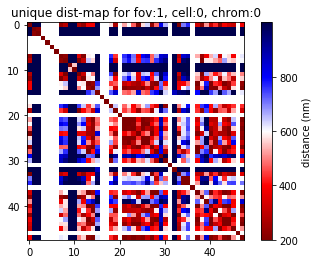

++ generate unique dist-map for fov:1, cell:0, chrom:1


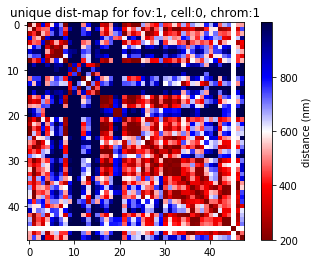

- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-0\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-0\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_distance_map']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-0\cell_info.pkl
++ picking spots for cell:1 by dynamic method:
+ Pick unique spots for by brightness in fov:1, cell:1
- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-1\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-1\cell_info.pkl
-- information updated in cell_info.pkl: ['picked_unique_spots']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-1\cell_info.pkl
+++ generating distance map for cell:1
++ generate unique dist-map for fov:1, cell:1, chrom:0


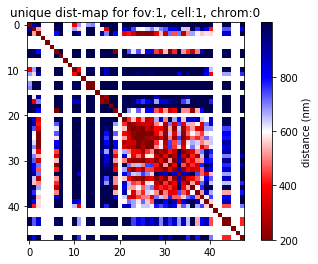

++ generate unique dist-map for fov:1, cell:1, chrom:1


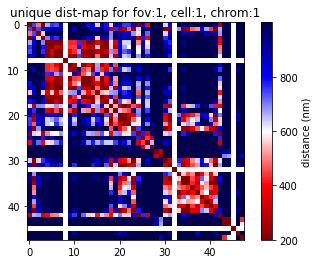

- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-1\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-1\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_distance_map']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-1\cell_info.pkl
++ picking spots for cell:2 by dynamic method:
+ Pick unique spots for by brightness in fov:1, cell:2
- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-2\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-2\cell_info.pkl
-- information updated in cell_info.pkl: ['picked_unique_spots']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-2\cell_info.pkl
+++ generating distance map for cell:2
++ generate unique dist-map for fov:1, cell:2, chrom:0


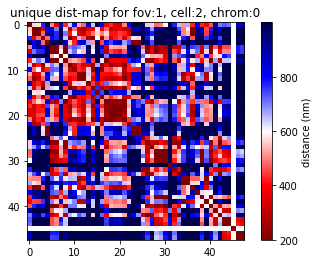

- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-2\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-2\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_distance_map']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-2\cell_info.pkl
++ picking spots for cell:3 by dynamic method:
+ Pick unique spots for by brightness in fov:1, cell:3
- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-3\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-3\cell_info.pkl
-- information updated in cell_info.pkl: ['picked_unique_spots']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-3\cell_info.pkl
+++ generating distance map for cell:3
++ generate unique dist-map for fov:1, cell:3, chrom:0


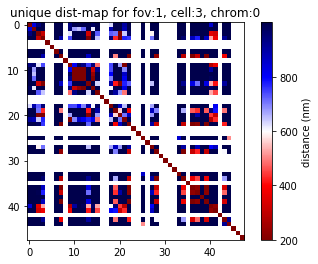

++ generate unique dist-map for fov:1, cell:3, chrom:1


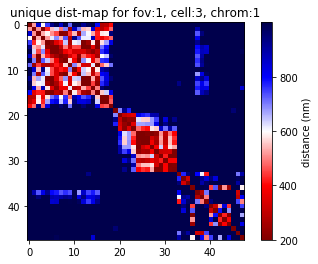

- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-3\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-3\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_distance_map']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-3\cell_info.pkl
++ picking spots for cell:4 by dynamic method:
+ Pick unique spots for by brightness in fov:1, cell:4
- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-4\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-4\cell_info.pkl
-- information updated in cell_info.pkl: ['picked_unique_spots']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-4\cell_info.pkl
+++ generating distance map for cell:4
++ generate unique dist-map for fov:1, cell:4, chrom:0


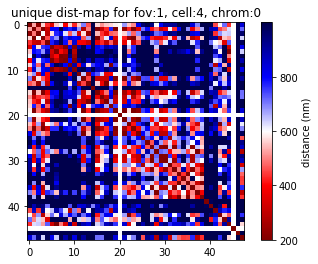

++ generate unique dist-map for fov:1, cell:4, chrom:1


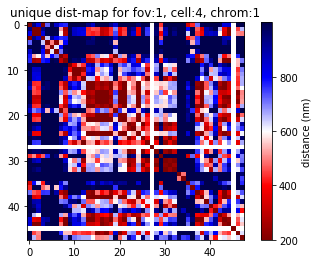

- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-4\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-4\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_distance_map']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-4\cell_info.pkl
++ picking spots for cell:5 by dynamic method:
+ Pick unique spots for by brightness in fov:1, cell:5
- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-5\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-5\cell_info.pkl
-- information updated in cell_info.pkl: ['picked_unique_spots']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-5\cell_info.pkl
+++ generating distance map for cell:5
++ generate unique dist-map for fov:1, cell:5, chrom:0


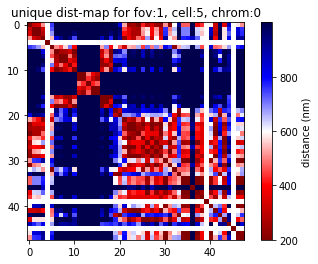

++ generate unique dist-map for fov:1, cell:5, chrom:1


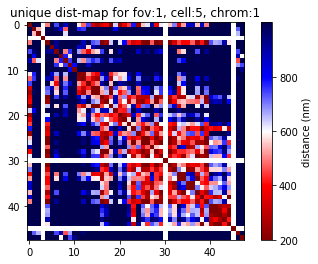

- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-5\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-5\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_distance_map']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-5\cell_info.pkl
++ picking spots for cell:6 by dynamic method:
+ Pick unique spots for by brightness in fov:1, cell:6
- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-6\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-6\cell_info.pkl
-- information updated in cell_info.pkl: ['picked_unique_spots']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-6\cell_info.pkl
+++ generating distance map for cell:6
++ generate unique dist-map for fov:1, cell:6, chrom:0


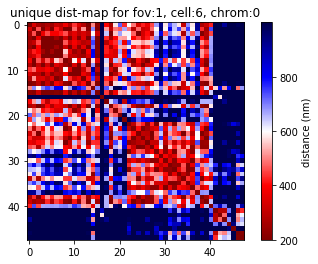

++ generate unique dist-map for fov:1, cell:6, chrom:1


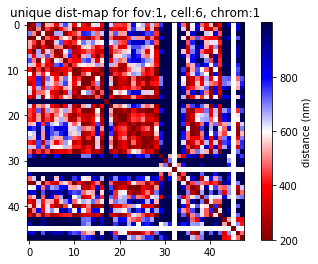

- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-6\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-6\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_distance_map']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-6\cell_info.pkl
++ picking spots for cell:7 by dynamic method:
+ Pick unique spots for by brightness in fov:1, cell:7
- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-7\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-7\cell_info.pkl
-- information updated in cell_info.pkl: ['picked_unique_spots']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-7\cell_info.pkl
+++ generating distance map for cell:7
++ generate unique dist-map for fov:1, cell:7, chrom:0


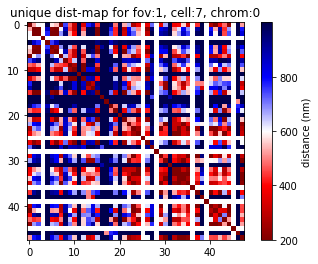

++ generate unique dist-map for fov:1, cell:7, chrom:1


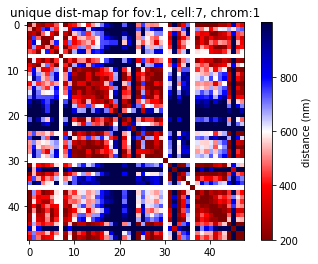

- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-7\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-7\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_distance_map']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-7\cell_info.pkl
++ picking spots for cell:8 by dynamic method:
+ Pick unique spots for by brightness in fov:1, cell:8
- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-8\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-8\cell_info.pkl
-- information updated in cell_info.pkl: ['picked_unique_spots']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-8\cell_info.pkl
+++ generating distance map for cell:8
++ generate unique dist-map for fov:1, cell:8, chrom:0


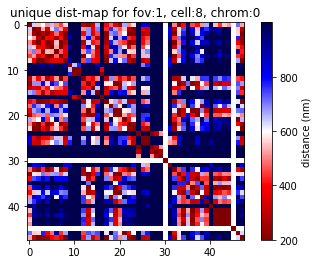

++ generate unique dist-map for fov:1, cell:8, chrom:1


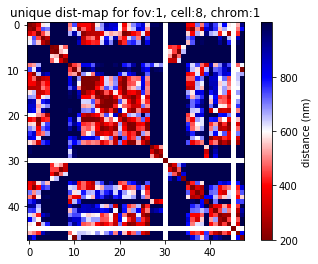

- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-8\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-8\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_distance_map']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-8\cell_info.pkl
++ picking spots for cell:9 by dynamic method:
+ Pick unique spots for by brightness in fov:1, cell:9
- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-9\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-9\cell_info.pkl
-- information updated in cell_info.pkl: ['picked_unique_spots']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-9\cell_info.pkl
+++ generating distance map for cell:9
++ generate unique dist-map for fov:1, cell:9, chrom:0


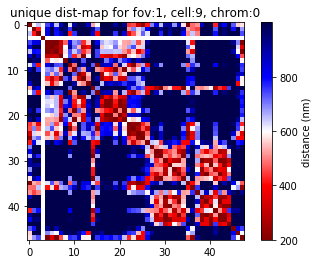

- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-9\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-9\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_distance_map']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-9\cell_info.pkl
++ picking spots for cell:10 by dynamic method:
+ Pick unique spots for by brightness in fov:1, cell:10
- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-10\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-10\cell_info.pkl
-- information updated in cell_info.pkl: ['picked_unique_spots']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-10\cell_info.pkl
+++ generating distance map for cell:10
++ generate unique dist-map for fov:1, cell:10, chrom:0


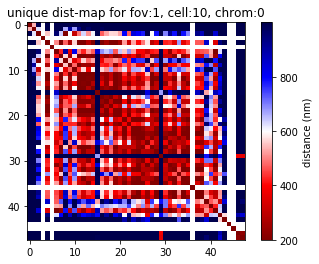

++ generate unique dist-map for fov:1, cell:10, chrom:1


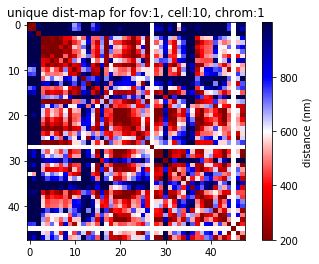

- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-10\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-10\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_distance_map']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-10\cell_info.pkl
++ picking spots for cell:11 by dynamic method:
+ Pick unique spots for by brightness in fov:1, cell:11
- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-11\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-11\cell_info.pkl
-- information updated in cell_info.pkl: ['picked_unique_spots']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-11\cell_info.pkl
+++ generating distance map for cell:11
++ generate unique dist-map for fov:1, cell:11, chrom:0


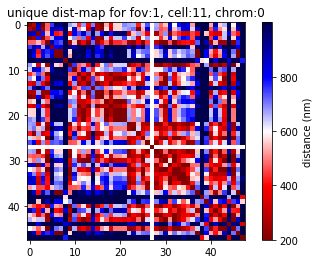

++ generate unique dist-map for fov:1, cell:11, chrom:1


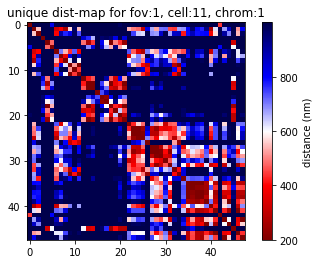

- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-11\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-11\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_distance_map']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-11\cell_info.pkl
++ picking spots for cell:12 by dynamic method:
+ Pick unique spots for by brightness in fov:1, cell:12
- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-12\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-12\cell_info.pkl
-- information updated in cell_info.pkl: ['picked_unique_spots']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-12\cell_info.pkl
+++ generating distance map for cell:12
++ generate unique dist-map for fov:1, cell:12, chrom:0


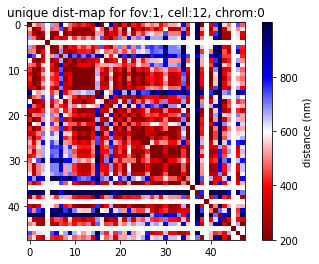

++ generate unique dist-map for fov:1, cell:12, chrom:1


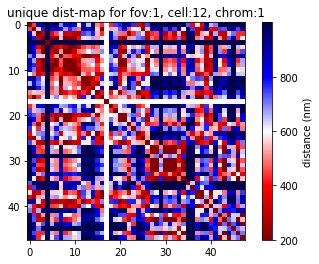

- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-12\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-12\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_distance_map']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-12\cell_info.pkl
++ picking spots for cell:13 by dynamic method:
+ Pick unique spots for by brightness in fov:1, cell:13
- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-13\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-13\cell_info.pkl
-- information updated in cell_info.pkl: ['picked_unique_spots']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-13\cell_info.pkl
+++ generating distance map for cell:13
++ generate unique dist-map for fov:1, cell:13, chrom:0


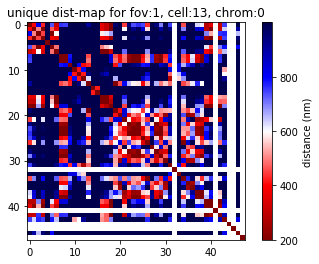

++ generate unique dist-map for fov:1, cell:13, chrom:1


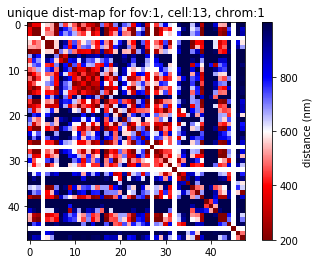

- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-13\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-13\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_distance_map']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-13\cell_info.pkl
++ picking spots for cell:14 by dynamic method:
+ Pick unique spots for by brightness in fov:1, cell:14
- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-14\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-14\cell_info.pkl
-- information updated in cell_info.pkl: ['picked_unique_spots']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-14\cell_info.pkl
+++ generating distance map for cell:14
- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-14\cell_info.pkl
-- loading existing info from

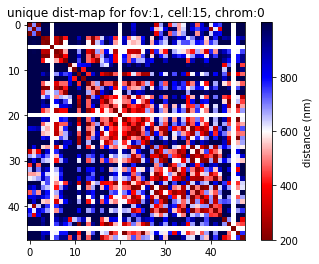

++ generate unique dist-map for fov:1, cell:15, chrom:1


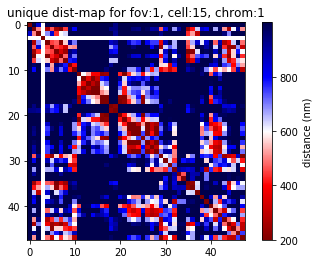

- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-15\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-15\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_distance_map']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-15\cell_info.pkl
++ picking spots for cell:16 by dynamic method:
+ Pick unique spots for by brightness in fov:1, cell:16
- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-16\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-16\cell_info.pkl
-- information updated in cell_info.pkl: ['picked_unique_spots']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-16\cell_info.pkl
+++ generating distance map for cell:16
++ generate unique dist-map for fov:1, cell:16, chrom:0


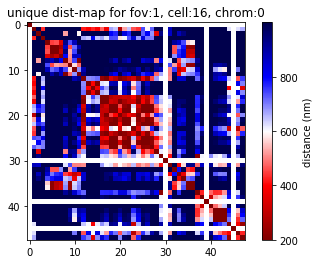

++ generate unique dist-map for fov:1, cell:16, chrom:1


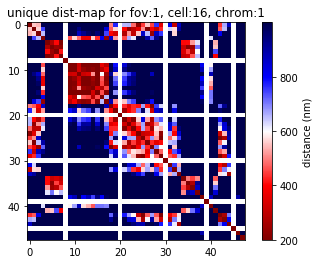

- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-16\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-16\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_distance_map']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-16\cell_info.pkl
++ picking spots for cell:17 by dynamic method:
+ Pick unique spots for by brightness in fov:1, cell:17
- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-17\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-17\cell_info.pkl
-- information updated in cell_info.pkl: ['picked_unique_spots']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-17\cell_info.pkl
+++ generating distance map for cell:17
++ generate unique dist-map for fov:1, cell:17, chrom:0


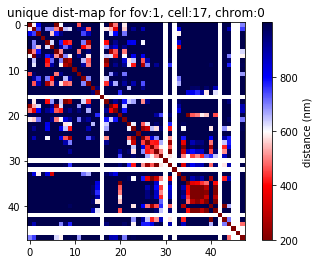

++ generate unique dist-map for fov:1, cell:17, chrom:1


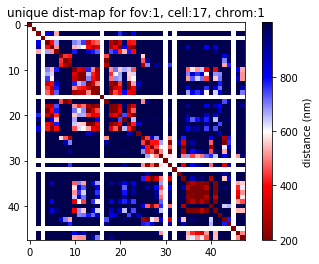

- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-17\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-17\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_distance_map']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-17\cell_info.pkl
++ picking spots for cell:18 by dynamic method:
+ Pick unique spots for by brightness in fov:1, cell:18
- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-18\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-18\cell_info.pkl
-- information updated in cell_info.pkl: ['picked_unique_spots']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-18\cell_info.pkl
+++ generating distance map for cell:18
- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-18\cell_info.pkl
-- loading existing info from

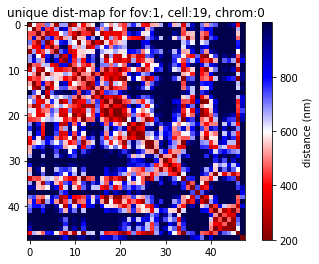

- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-19\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-19\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_distance_map']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-19\cell_info.pkl
++ picking spots for cell:20 by dynamic method:
+ Pick unique spots for by brightness in fov:1, cell:20
- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-20\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-20\cell_info.pkl
-- information updated in cell_info.pkl: ['picked_unique_spots']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-20\cell_info.pkl
+++ generating distance map for cell:20
++ generate unique dist-map for fov:1, cell:20, chrom:0


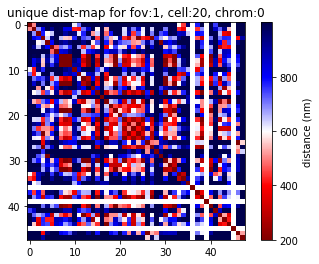

++ generate unique dist-map for fov:1, cell:20, chrom:1


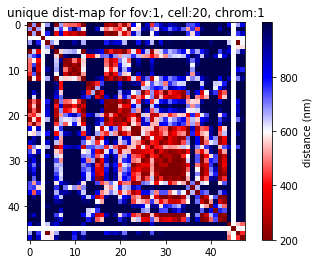

- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-20\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-20\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_distance_map']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-20\cell_info.pkl
++ picking spots for cell:21 by dynamic method:
+ Pick unique spots for by brightness in fov:1, cell:21
- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-21\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-21\cell_info.pkl
-- information updated in cell_info.pkl: ['picked_unique_spots']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-21\cell_info.pkl
+++ generating distance map for cell:21
++ generate unique dist-map for fov:1, cell:21, chrom:0


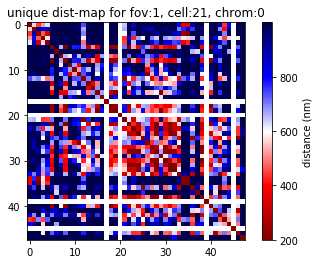

++ generate unique dist-map for fov:1, cell:21, chrom:1


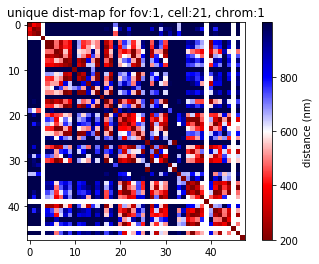

- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-21\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-21\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_distance_map']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-21\cell_info.pkl
++ picking spots for cell:22 by dynamic method:
+ Pick unique spots for by brightness in fov:1, cell:22
- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-22\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-22\cell_info.pkl
-- information updated in cell_info.pkl: ['picked_unique_spots']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-22\cell_info.pkl
+++ generating distance map for cell:22
- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-22\cell_info.pkl
-- loading existing info from

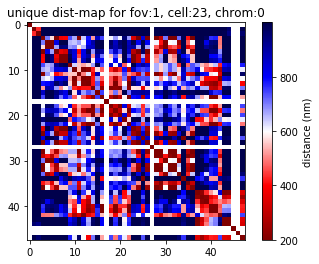

++ generate unique dist-map for fov:1, cell:23, chrom:1


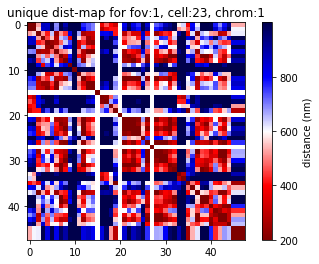

- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-23\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-23\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_distance_map']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-23\cell_info.pkl
++ picking spots for cell:24 by dynamic method:
+ Pick unique spots for by brightness in fov:1, cell:24
- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-24\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-24\cell_info.pkl
-- information updated in cell_info.pkl: ['picked_unique_spots']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-24\cell_info.pkl
+++ generating distance map for cell:24
++ generate unique dist-map for fov:1, cell:24, chrom:0


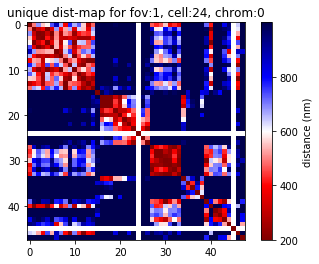

- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-24\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-24\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_distance_map']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-24\cell_info.pkl
++ picking spots for cell:25 by dynamic method:
+ Pick unique spots for by brightness in fov:1, cell:25
- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-25\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-25\cell_info.pkl
-- information updated in cell_info.pkl: ['picked_unique_spots']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-25\cell_info.pkl
+++ generating distance map for cell:25
++ generate unique dist-map for fov:1, cell:25, chrom:0


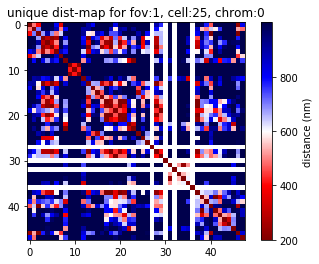

++ generate unique dist-map for fov:1, cell:25, chrom:1


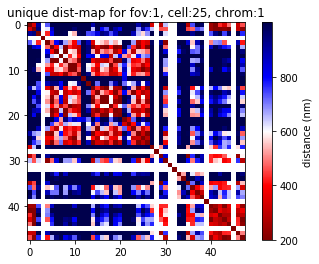

- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-25\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-25\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_distance_map']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-25\cell_info.pkl
++ picking spots for cell:26 by dynamic method:
+ Pick unique spots for by brightness in fov:1, cell:26
- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-26\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-26\cell_info.pkl
-- information updated in cell_info.pkl: ['picked_unique_spots']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-26\cell_info.pkl
+++ generating distance map for cell:26
++ generate unique dist-map for fov:1, cell:26, chrom:0


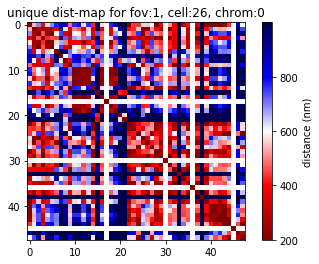

++ generate unique dist-map for fov:1, cell:26, chrom:1


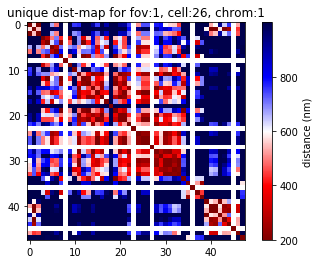

- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-26\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-26\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_distance_map']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-26\cell_info.pkl
++ picking spots for cell:27 by dynamic method:
+ Pick unique spots for by brightness in fov:1, cell:27
- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-27\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-27\cell_info.pkl
-- information updated in cell_info.pkl: ['picked_unique_spots']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-27\cell_info.pkl
+++ generating distance map for cell:27
++ generate unique dist-map for fov:1, cell:27, chrom:0


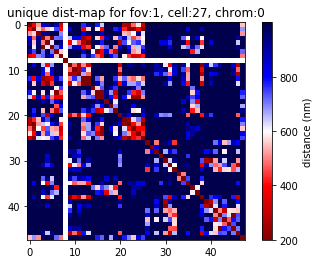

- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-27\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-27\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_distance_map']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-27\cell_info.pkl
++ picking spots for cell:28 by dynamic method:
+ Pick unique spots for by brightness in fov:1, cell:28
- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-28\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-28\cell_info.pkl
-- information updated in cell_info.pkl: ['picked_unique_spots']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-28\cell_info.pkl
+++ generating distance map for cell:28
++ generate unique dist-map for fov:1, cell:28, chrom:0


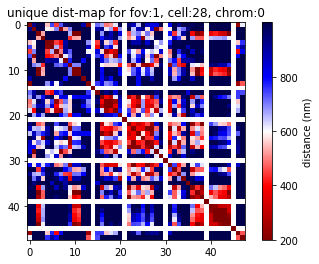

++ generate unique dist-map for fov:1, cell:28, chrom:1


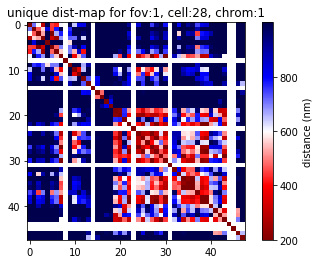

- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-28\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-28\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_distance_map']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-28\cell_info.pkl
++ picking spots for cell:29 by dynamic method:
+ Pick unique spots for by brightness in fov:1, cell:29
- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-29\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-29\cell_info.pkl
-- information updated in cell_info.pkl: ['picked_unique_spots']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-29\cell_info.pkl
+++ generating distance map for cell:29
++ generate unique dist-map for fov:1, cell:29, chrom:0


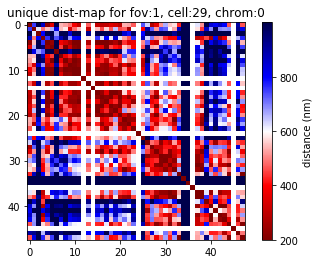

++ generate unique dist-map for fov:1, cell:29, chrom:1


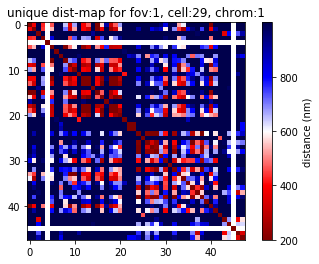

- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-29\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-29\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_distance_map']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-29\cell_info.pkl
++ picking spots for cell:30 by dynamic method:
+ Pick unique spots for by brightness in fov:1, cell:30
- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-30\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-30\cell_info.pkl
-- information updated in cell_info.pkl: ['picked_unique_spots']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-30\cell_info.pkl
+++ generating distance map for cell:30
++ generate unique dist-map for fov:1, cell:30, chrom:0


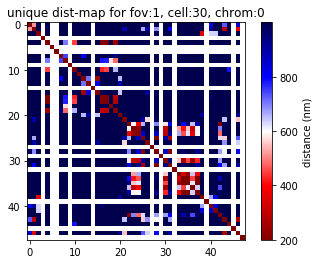

++ generate unique dist-map for fov:1, cell:30, chrom:1


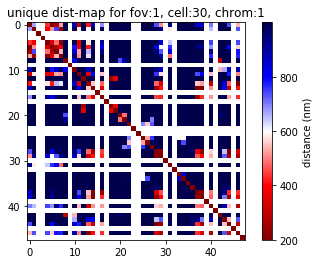

- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-30\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-30\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_distance_map']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-30\cell_info.pkl


In [14]:
lst._pick_spots_for_cells('unique', _pick_type='dynamic', _w_dist=2, _save=True)

## 5. Averaged distance map

+++ maximum distance-map size is 650
+++ chromosome filtered out by dist-map shape in fov:2, cell:10
+++ chromosome filtered out by dist-map shape in fov:2, cell:10
+++ chromosome filtered out by loss probability in fov:2, cell:10
+++ chromosome filtered out by dist-map shape in fov:2, cell:10
+++ chromosome filtered out by dist-map shape in fov:3, cell:6
+++ chromosome filtered out by dist-map shape in fov:3, cell:6
+++ chromosome filtered out by dist-map shape in fov:3, cell:13
+++ chromosome filtered out by dist-map shape in fov:3, cell:13
+++ chromosome filtered out by dist-map shape in fov:4, cell:1
+++ chromosome filtered out by dist-map shape in fov:4, cell:1
+++ chromosome filtered out by dist-map shape in fov:4, cell:3
+++ chromosome filtered out by dist-map shape in fov:4, cell:3
+++ chromosome filtered out by dist-map shape in fov:4, cell:3
+++ chromosome filtered out by dist-map shape in fov:4, cell:3
+++ chromosome filtered out by dist-map shape in fov:4, cell:3
+++ chromo

<IPython.core.display.Javascript object>


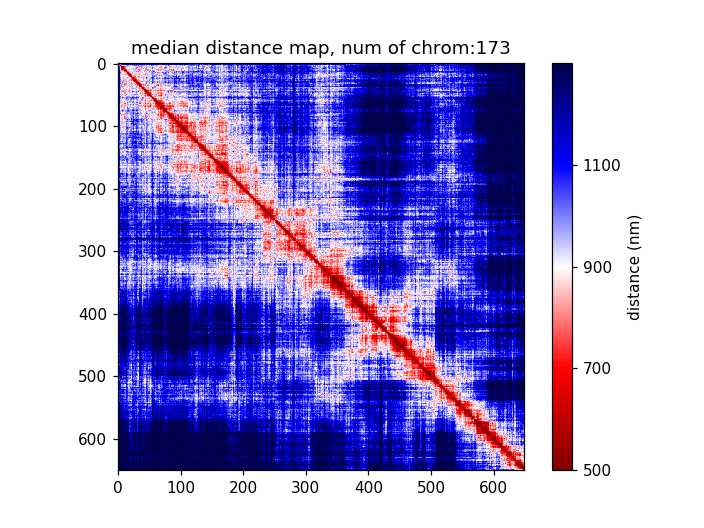

++ saving median distance map.


In [38]:
average_map, num_maps = lst._calculate_population_map('decoded', _plot_limits=[500,1300])

## 6. Comapring with Hi-C

In [40]:
from scipy.stats import linregress, pearsonr
import matplotlib
%matplotlib notebook

### 6.1 Visualize Hi-C

<IPython.core.display.Javascript object>


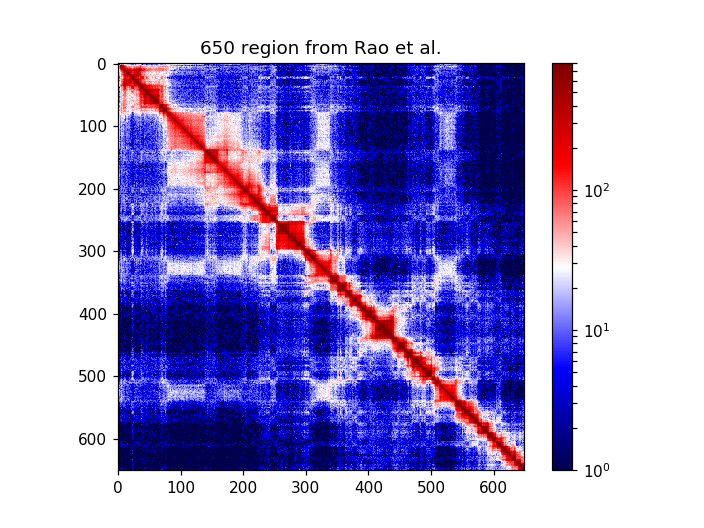

In [44]:
with np.load(r'E:\Users\puzheng\Documents\Hi-C\5x10_distmap.npz') as data:
    contact_map = data['distance_map'][1:,1:]
with np.load(r'E:\Users\puzheng\Documents\Hi-C\5x10_balanced_distmap.npz') as data:
    balanced_contact_map = data['distance_map'][:650,:650]

plt.figure()
plt.title('650 region from Rao et al.')
plt.imshow(contact_map+0.0001, interpolation='nearest', norm=matplotlib.colors.LogNorm(vmin=distance_map.min(), vmax=distance_map.max()),
           vmin=1, vmax=800, cmap='seismic')
plt.colorbar()
plt.show()

### 6.2 regression

In [36]:
kept = (np.array(average_map) > 0) * (np.array(contact_map) > 0)
k_sparse= average_map[kept];
k_hic = contact_map[kept];
lr = linregress(np.log(k_sparse),-np.log(k_hic))
print(lr)
print('pearson correlation:', np.sqrt(lr.rvalue))
px = np.arange(np.min(k_sparse
                     ),np.max(k_sparse))
py = np.exp(-np.log(px) * lr.slope - lr.intercept)

LinregressResult(slope=6.561050828839005, intercept=-47.617231674513995, rvalue=0.8029750904671853, pvalue=0.0, stderr=0.007882014656841276)
pearson correlation: 0.8960887737647344


### 6.3 log-log plot

<IPython.core.display.Javascript object>


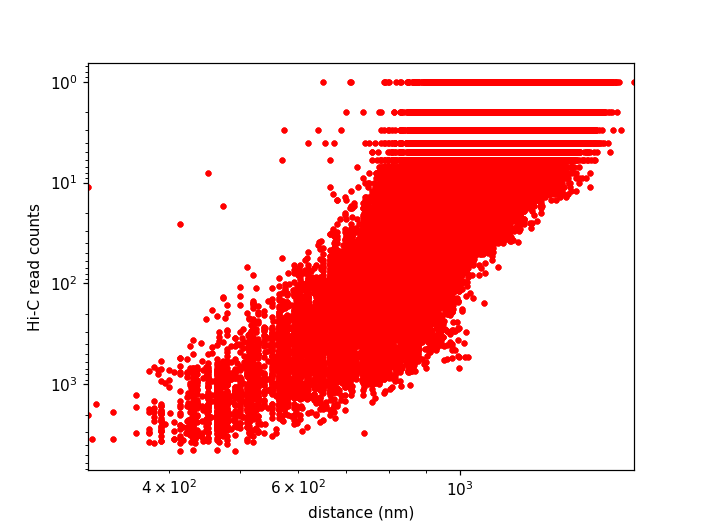

(310.12900541548834, 1728.9372458247292)

In [37]:
plt.figure()
plt.plot(k_sparse, k_hic,'r.')
#plt.plot(px, py, 'b')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Hi-C read counts')
plt.xlabel('distance (nm)')
plt.gca().invert_yaxis()
plt.xlim([np.min(k_sparse), np.max(k_sparse)])

### save distance maps

In [50]:
save_dic = {'Hi-C':contact_map,
            'distance':average_map}
np.savez(r'./distmaps', **save_dic)